In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import warnings 
from sklearn.pipeline import Pipeline 

In [111]:
warnings.filterwarnings('ignore') 

In [112]:
df = pd.read_csv('traffic.csv')
df

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [113]:
df.drop(['ID'], axis=1, inplace=True) 

In [114]:
df.describe()

Junction      Vehicles
count  48120.000000  48120.000000
mean       2.180549     22.791334
std        0.966955     20.750063
min        1.000000      1.000000
25%        1.000000      9.000000
50%        2.000000     15.000000
75%        3.000000     29.000000
max        4.000000    180.000000

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [116]:
df.head()

DateTime  Junction  Vehicles
0  2015-11-01 00:00:00         1        15
1  2015-11-01 01:00:00         1        13
2  2015-11-01 02:00:00         1        10
3  2015-11-01 03:00:00         1         7
4  2015-11-01 04:00:00         1         9

In [117]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [119]:
df_new = df.copy()

In [120]:
df_new['Year'] = df_new['DateTime'].dt.year 
df_new['Month'] = df_new['DateTime'].dt.month 
df_new['Date'] = df_new['DateTime'].dt.day 
df_new['Hour'] = df_new['DateTime'].dt.hour 
df_new['Day'] = df_new.DateTime.dt.strftime('%A') 

In [121]:
df_new

DateTime  Junction  Vehicles  Year  Month  Date  Hour     Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0  Sunday
1     2015-11-01 01:00:00         1        13  2015     11     1     1  Sunday
2     2015-11-01 02:00:00         1        10  2015     11     1     2  Sunday
3     2015-11-01 03:00:00         1         7  2015     11     1     3  Sunday
4     2015-11-01 04:00:00         1         9  2015     11     1     4  Sunday
...                   ...       ...       ...   ...    ...   ...   ...     ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19  Friday
48116 2017-06-30 20:00:00         4        30  2017      6    30    20  Friday
48117 2017-06-30 21:00:00         4        16  2017      6    30    21  Friday
48118 2017-06-30 22:00:00         4        22  2017      6    30    22  Friday
48119 2017-06-30 23:00:00         4        12  2017      6    30    23  Friday

[48120 rows x 8 columns]

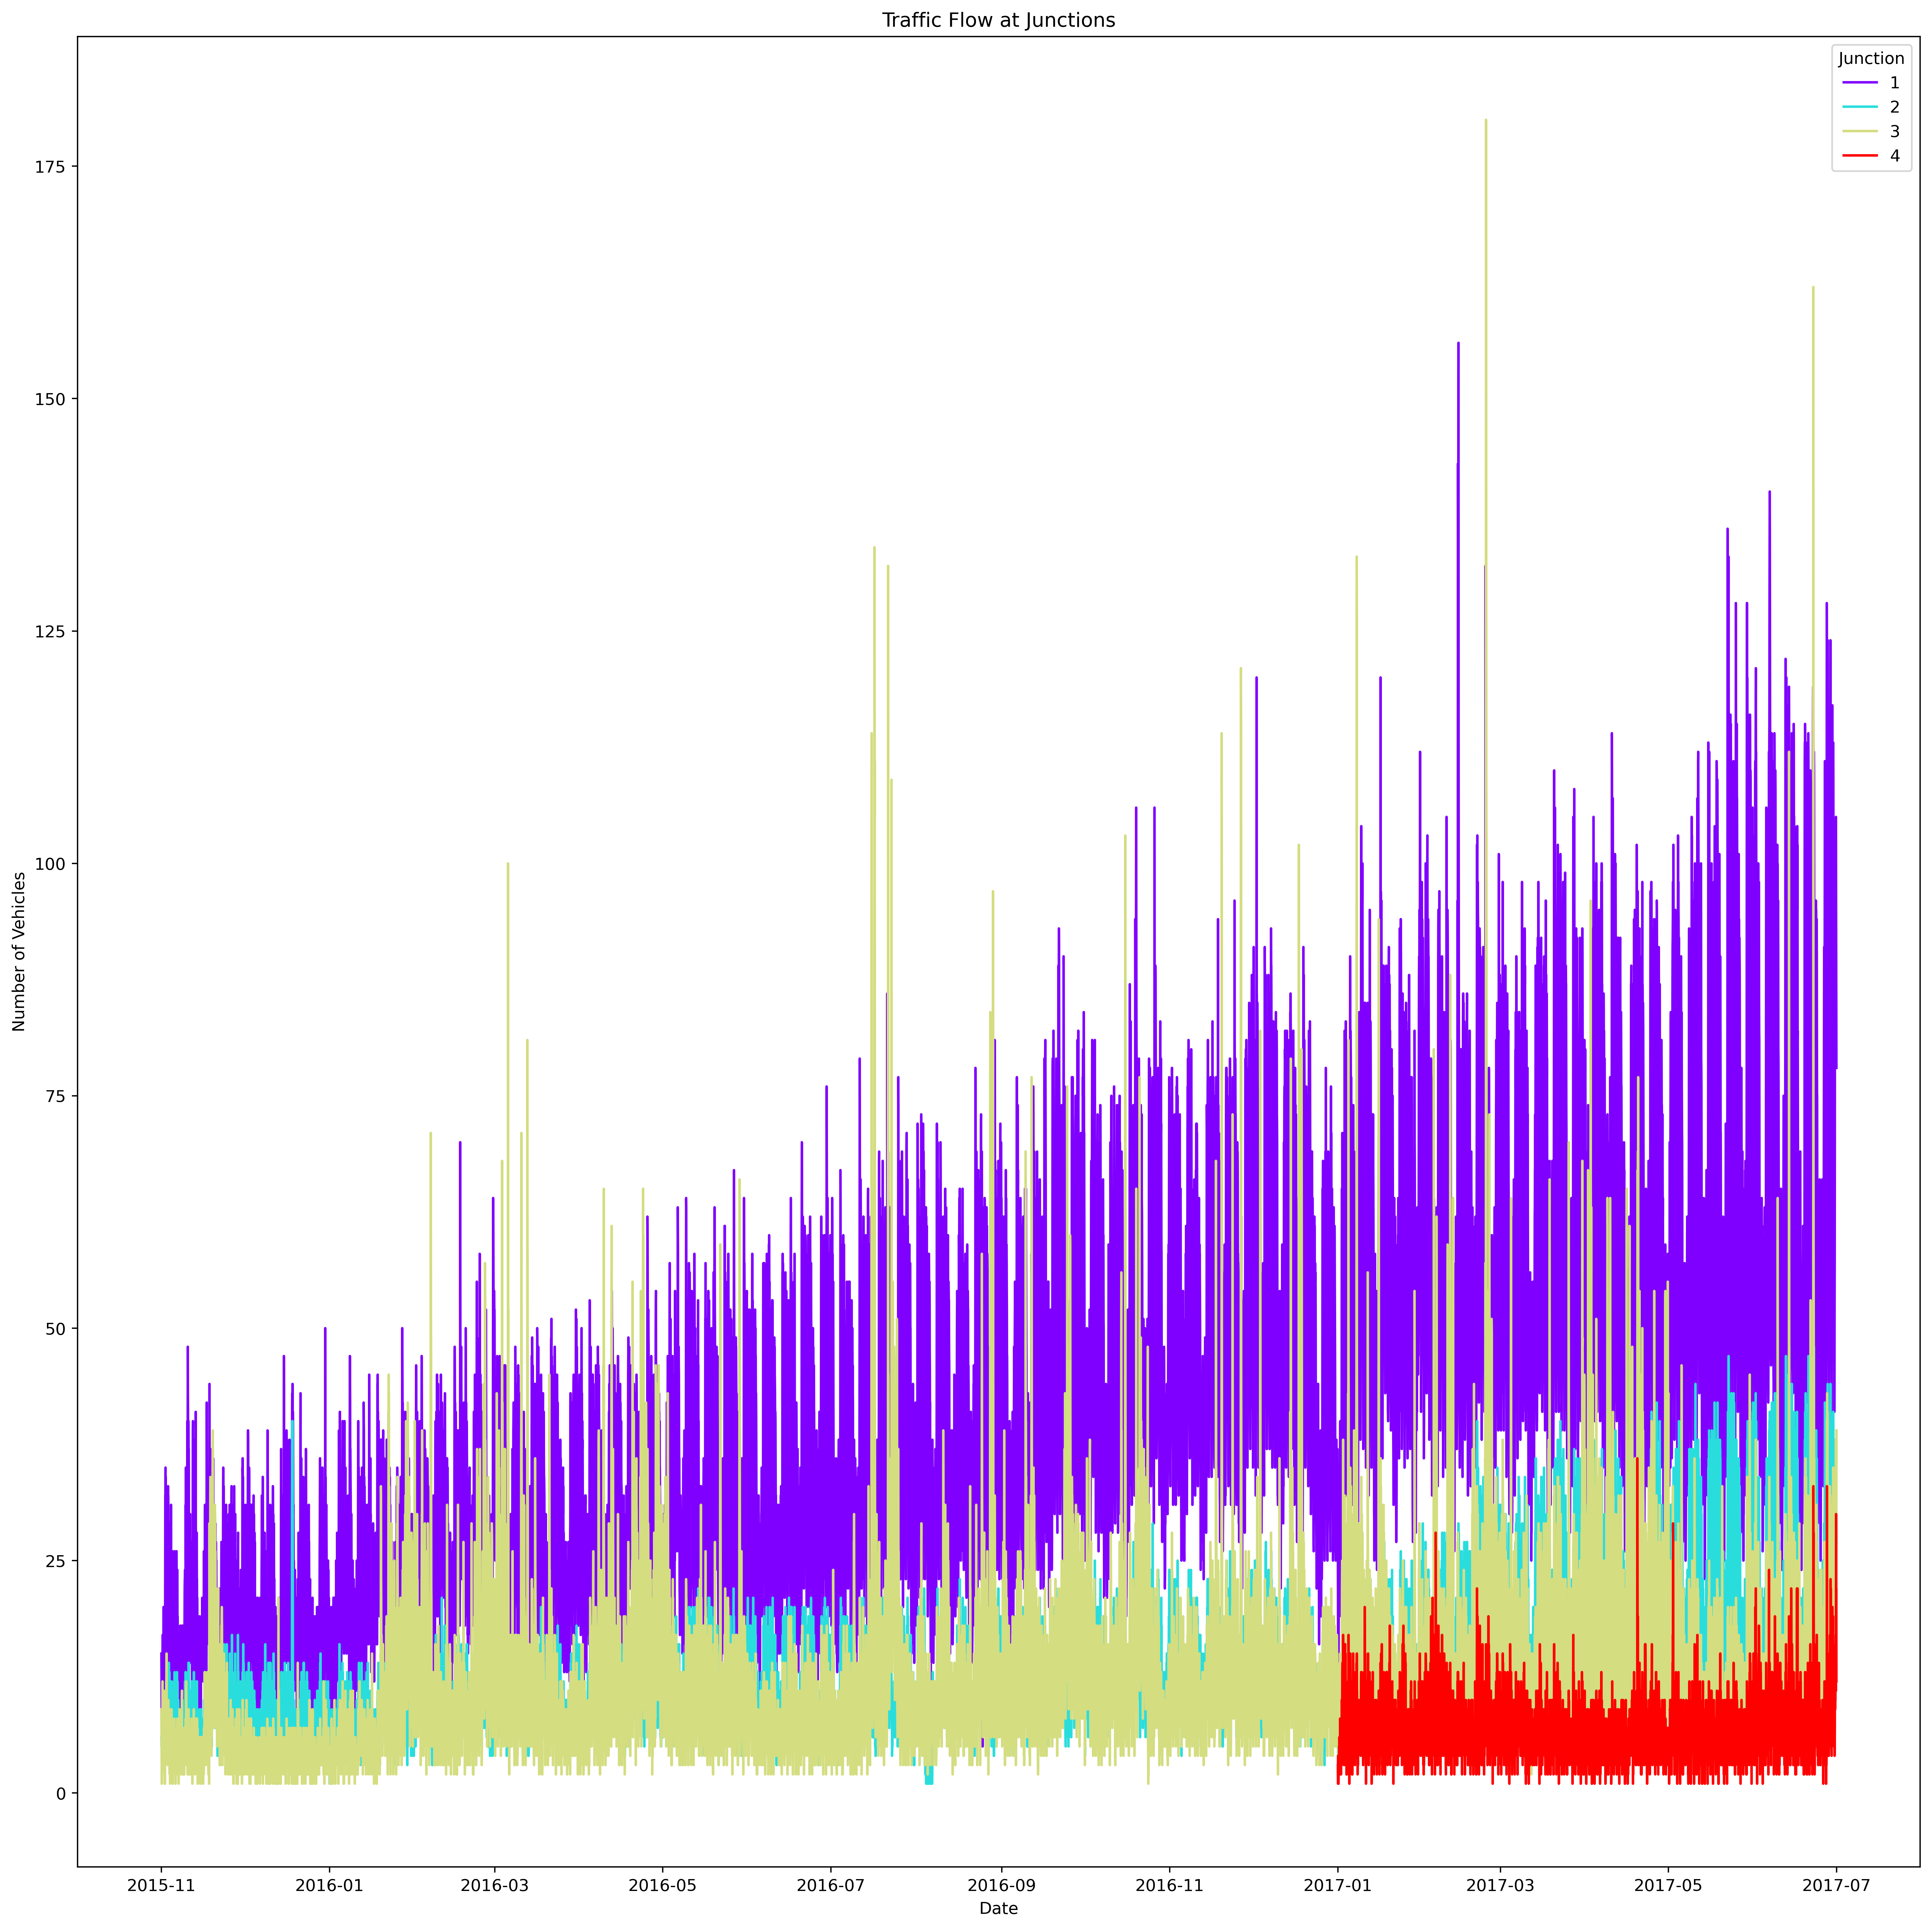

In [122]:
plt.figure(figsize=(20, 20), dpi = 400) 
plot = sns.lineplot(x = df['DateTime'], y = "Vehicles", data = df, hue="Junction", palette="rainbow") 
plot.set_title('Traffic Flow at Junctions') 
plot.set_xlabel('Date') 
plot.set_ylabel('Number of Vehicles') 
plt.savefig('traffic_flow.png') 
plt.show() 

<Figure size 8000x8000 with 0 Axes>

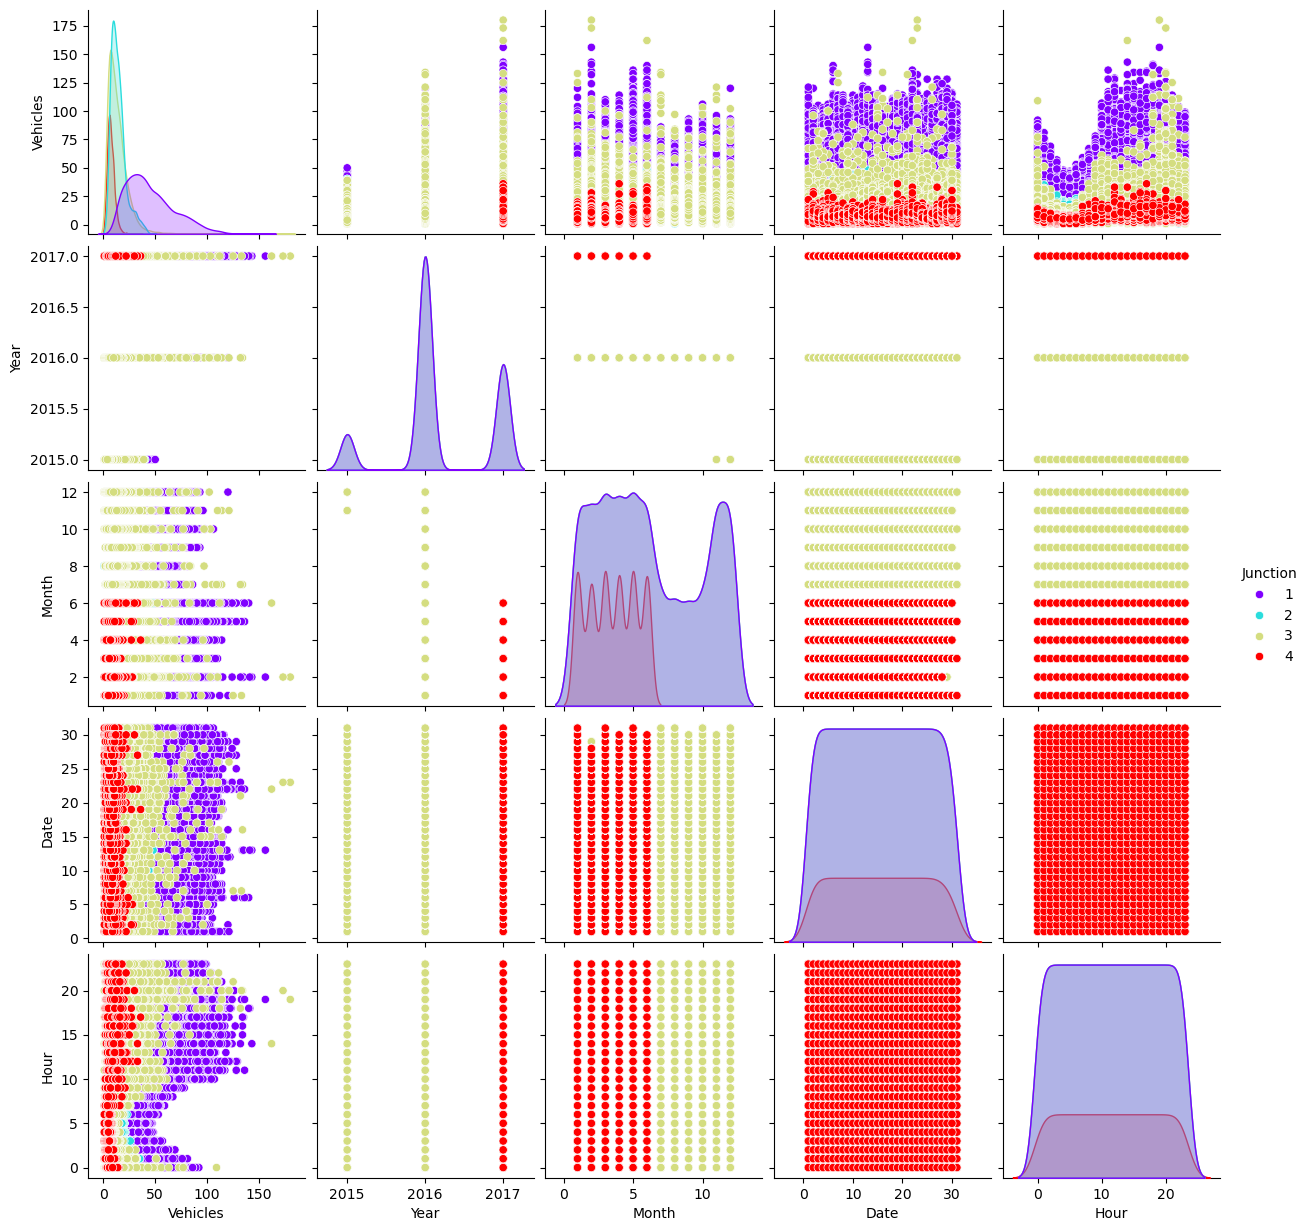

In [123]:
plt.figure(figsize=(20, 20), dpi = 400) 
sns.pairplot(df_new, hue="Junction", palette="rainbow") 
plt.savefig('traffic_flow_pairplot.png')
plt.show()

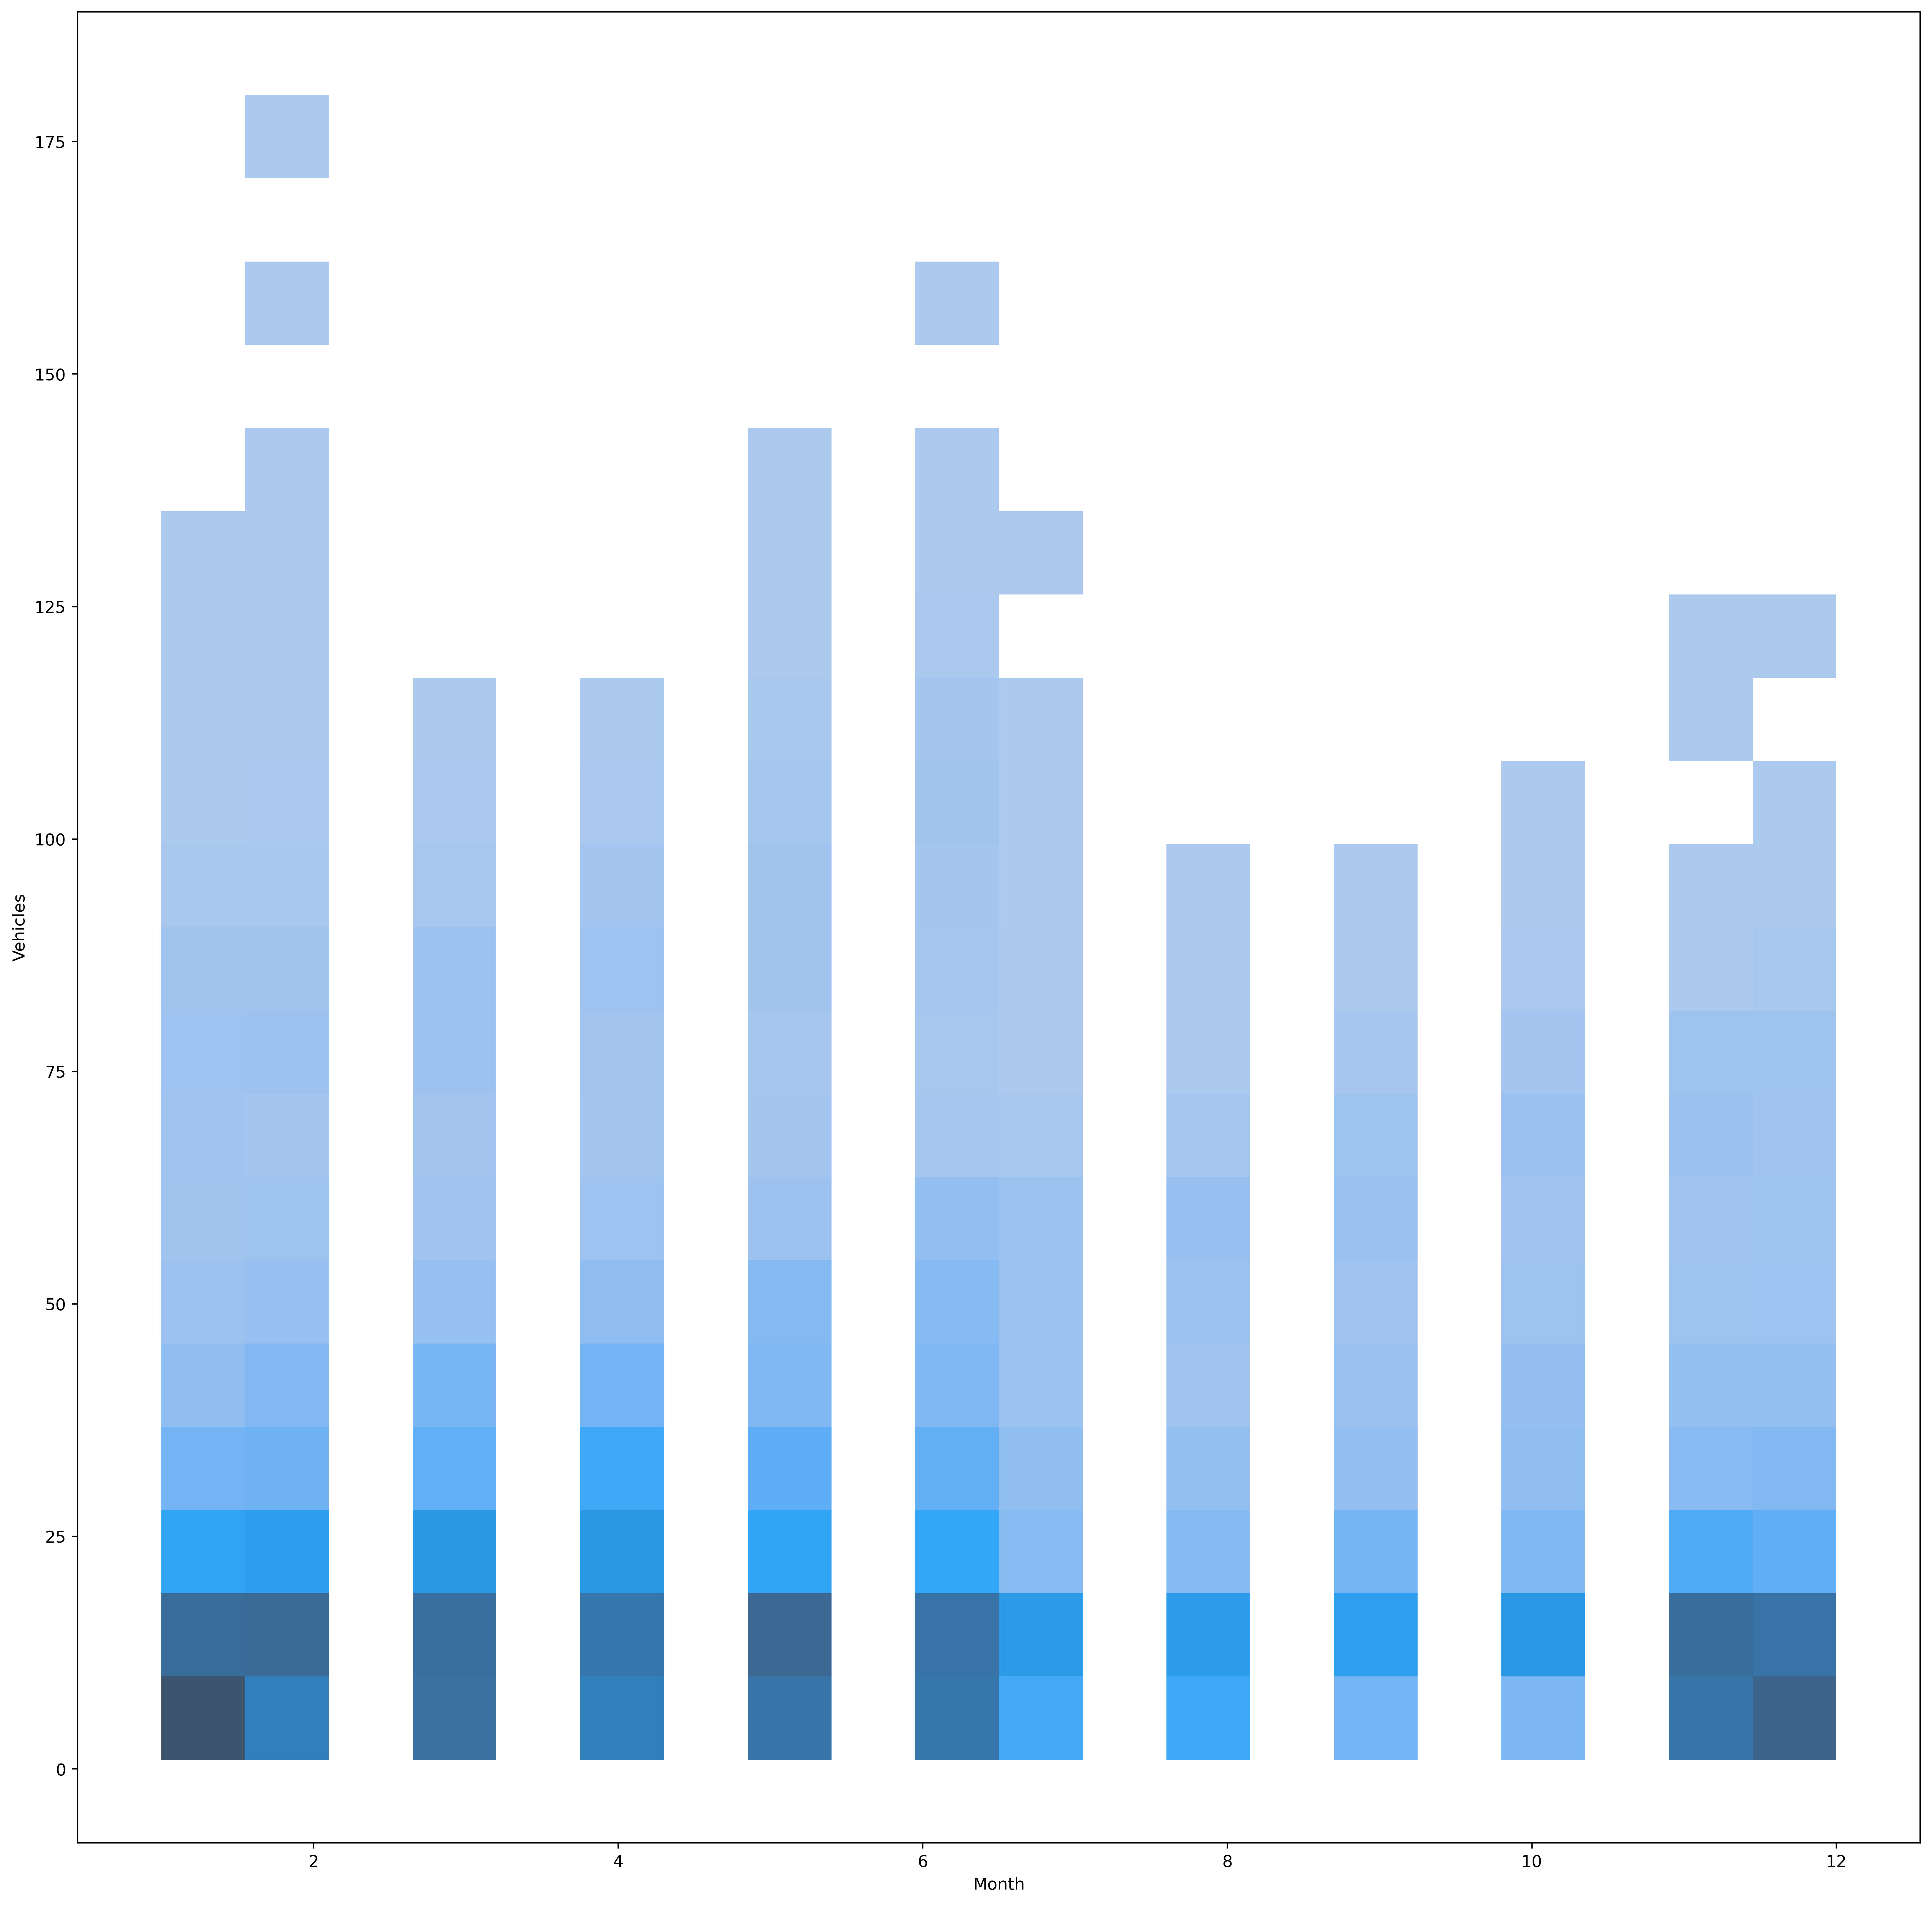

In [124]:
plt.figure(figsize=(20,20), dpi=400)
sns.histplot(x='Month', y='Vehicles', data=df_new, bins=20) 
plt.savefig('traffic_flow_monthwise.png') 
plt.show() 

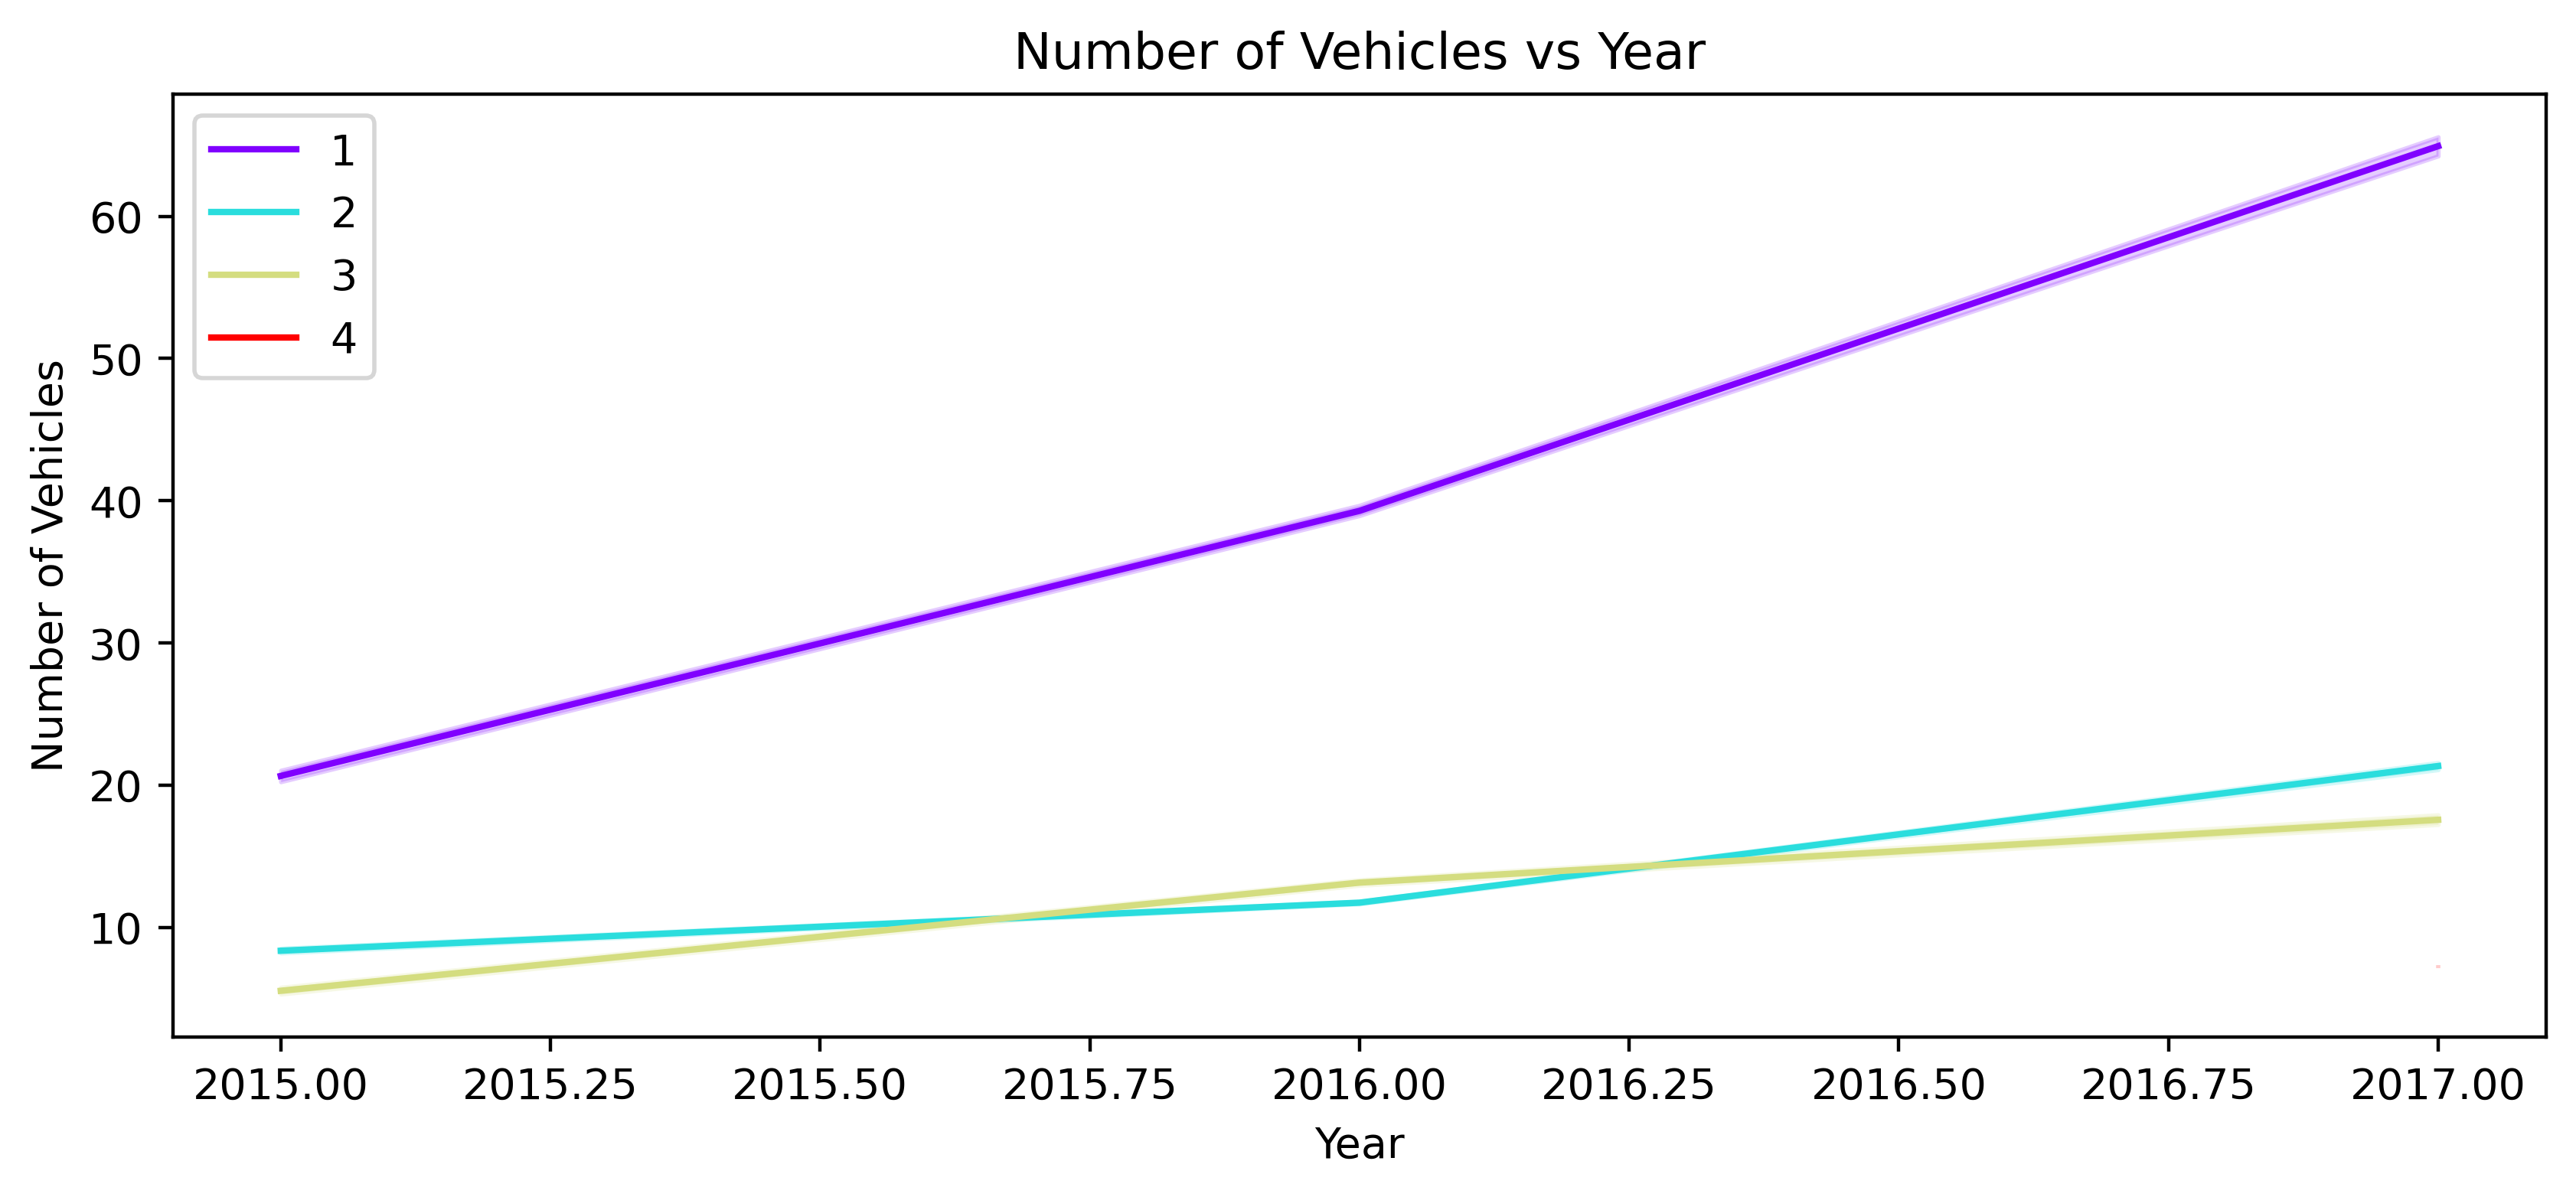

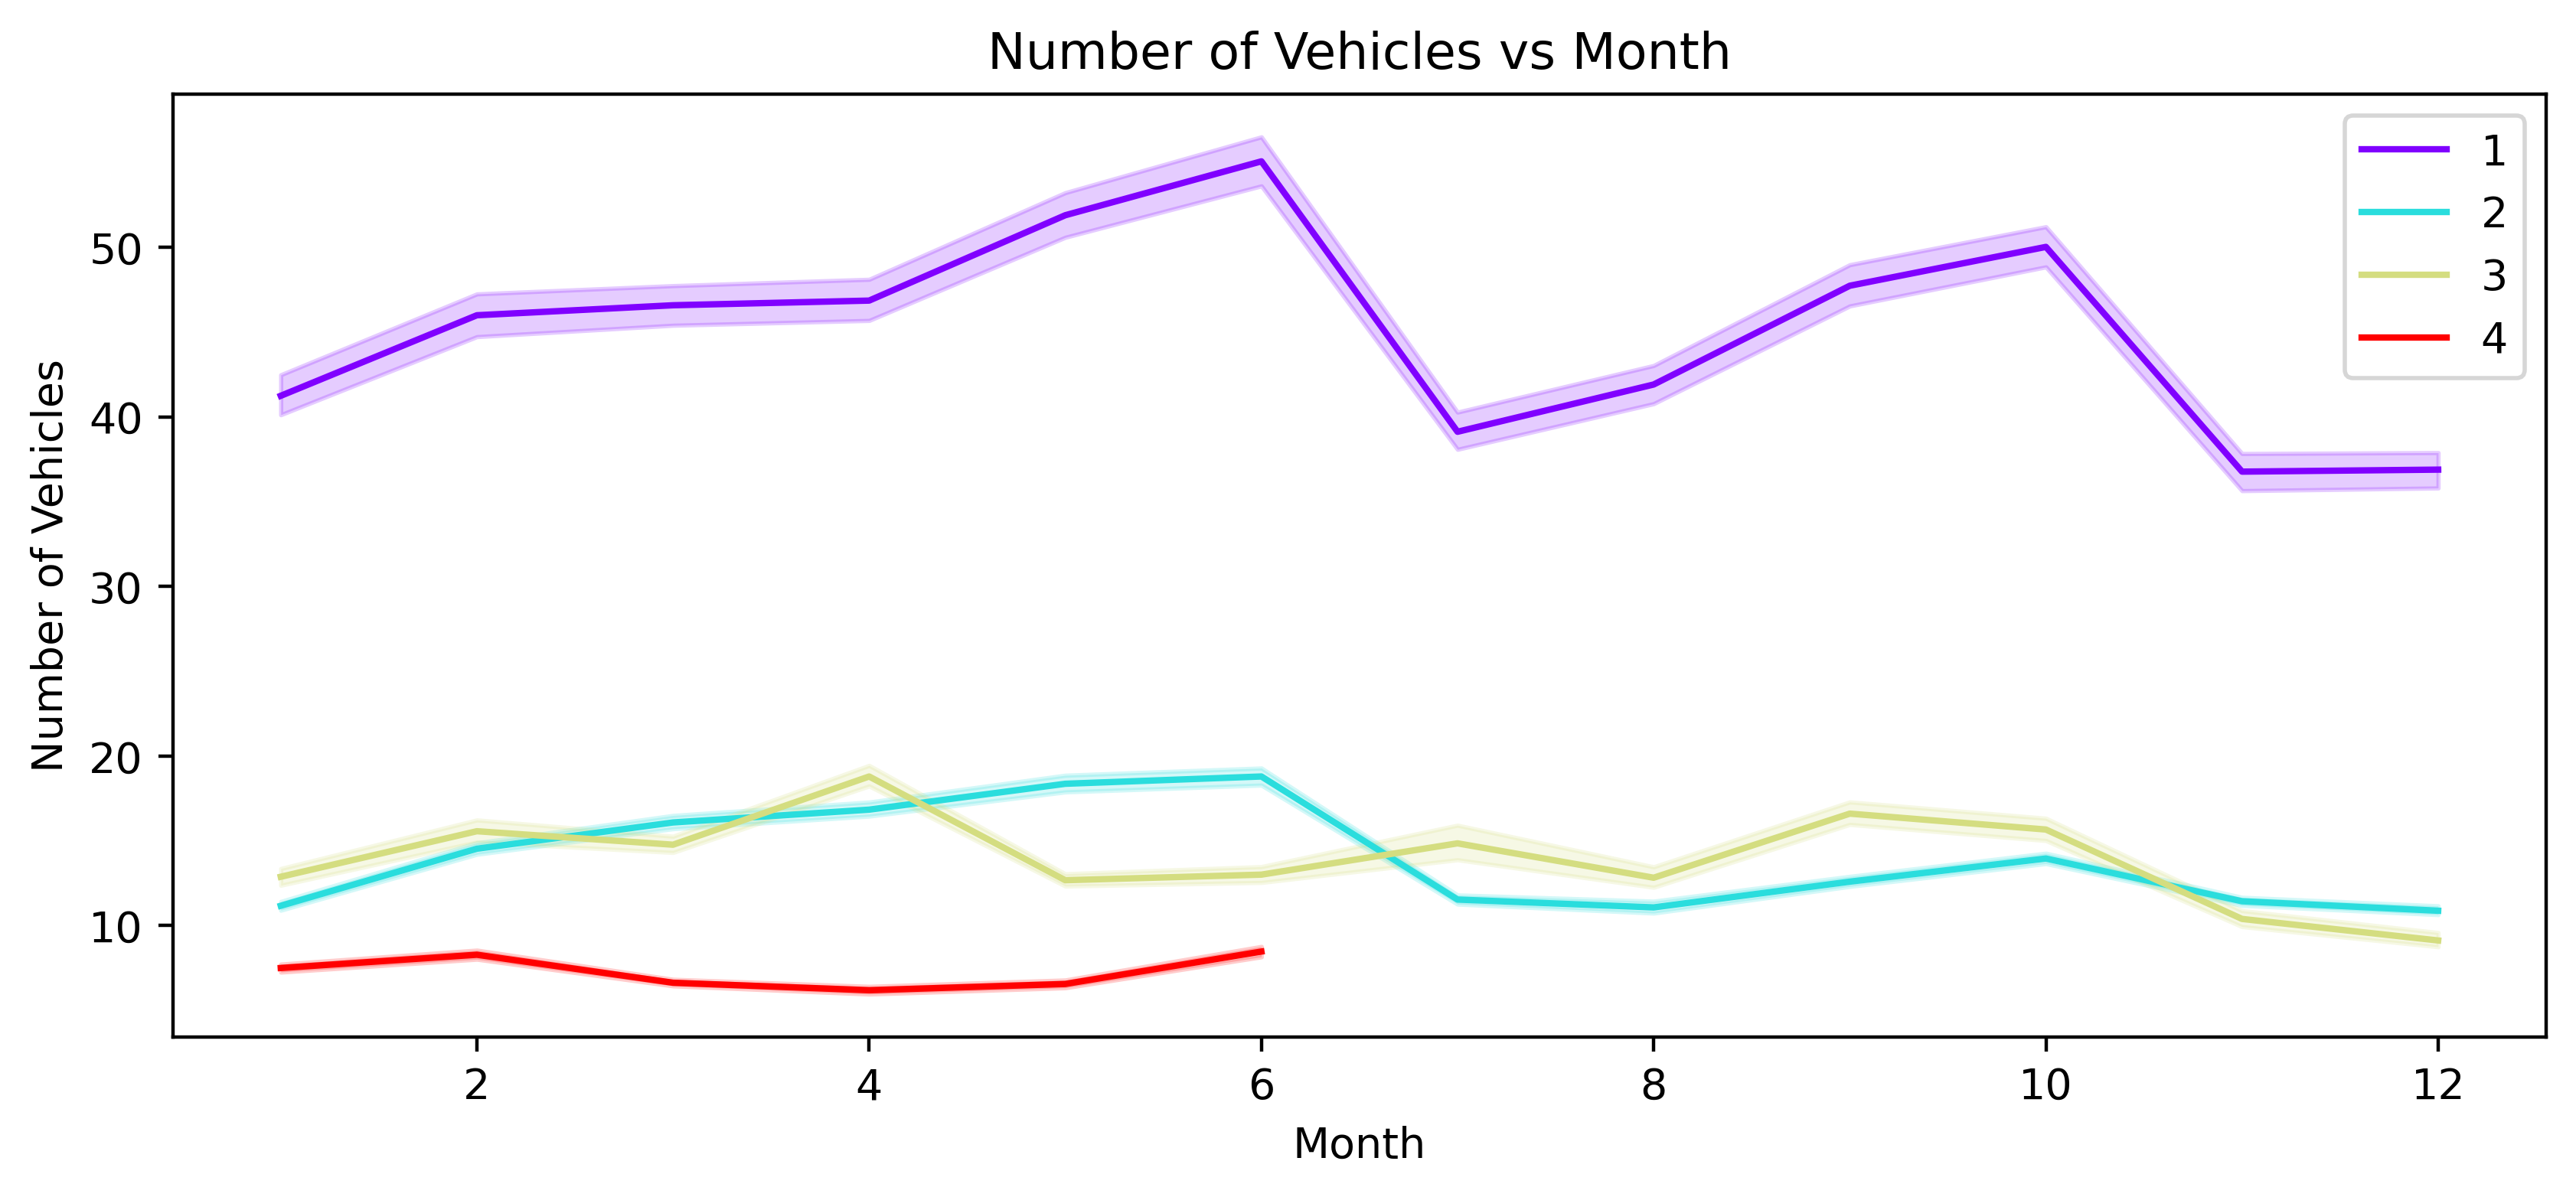

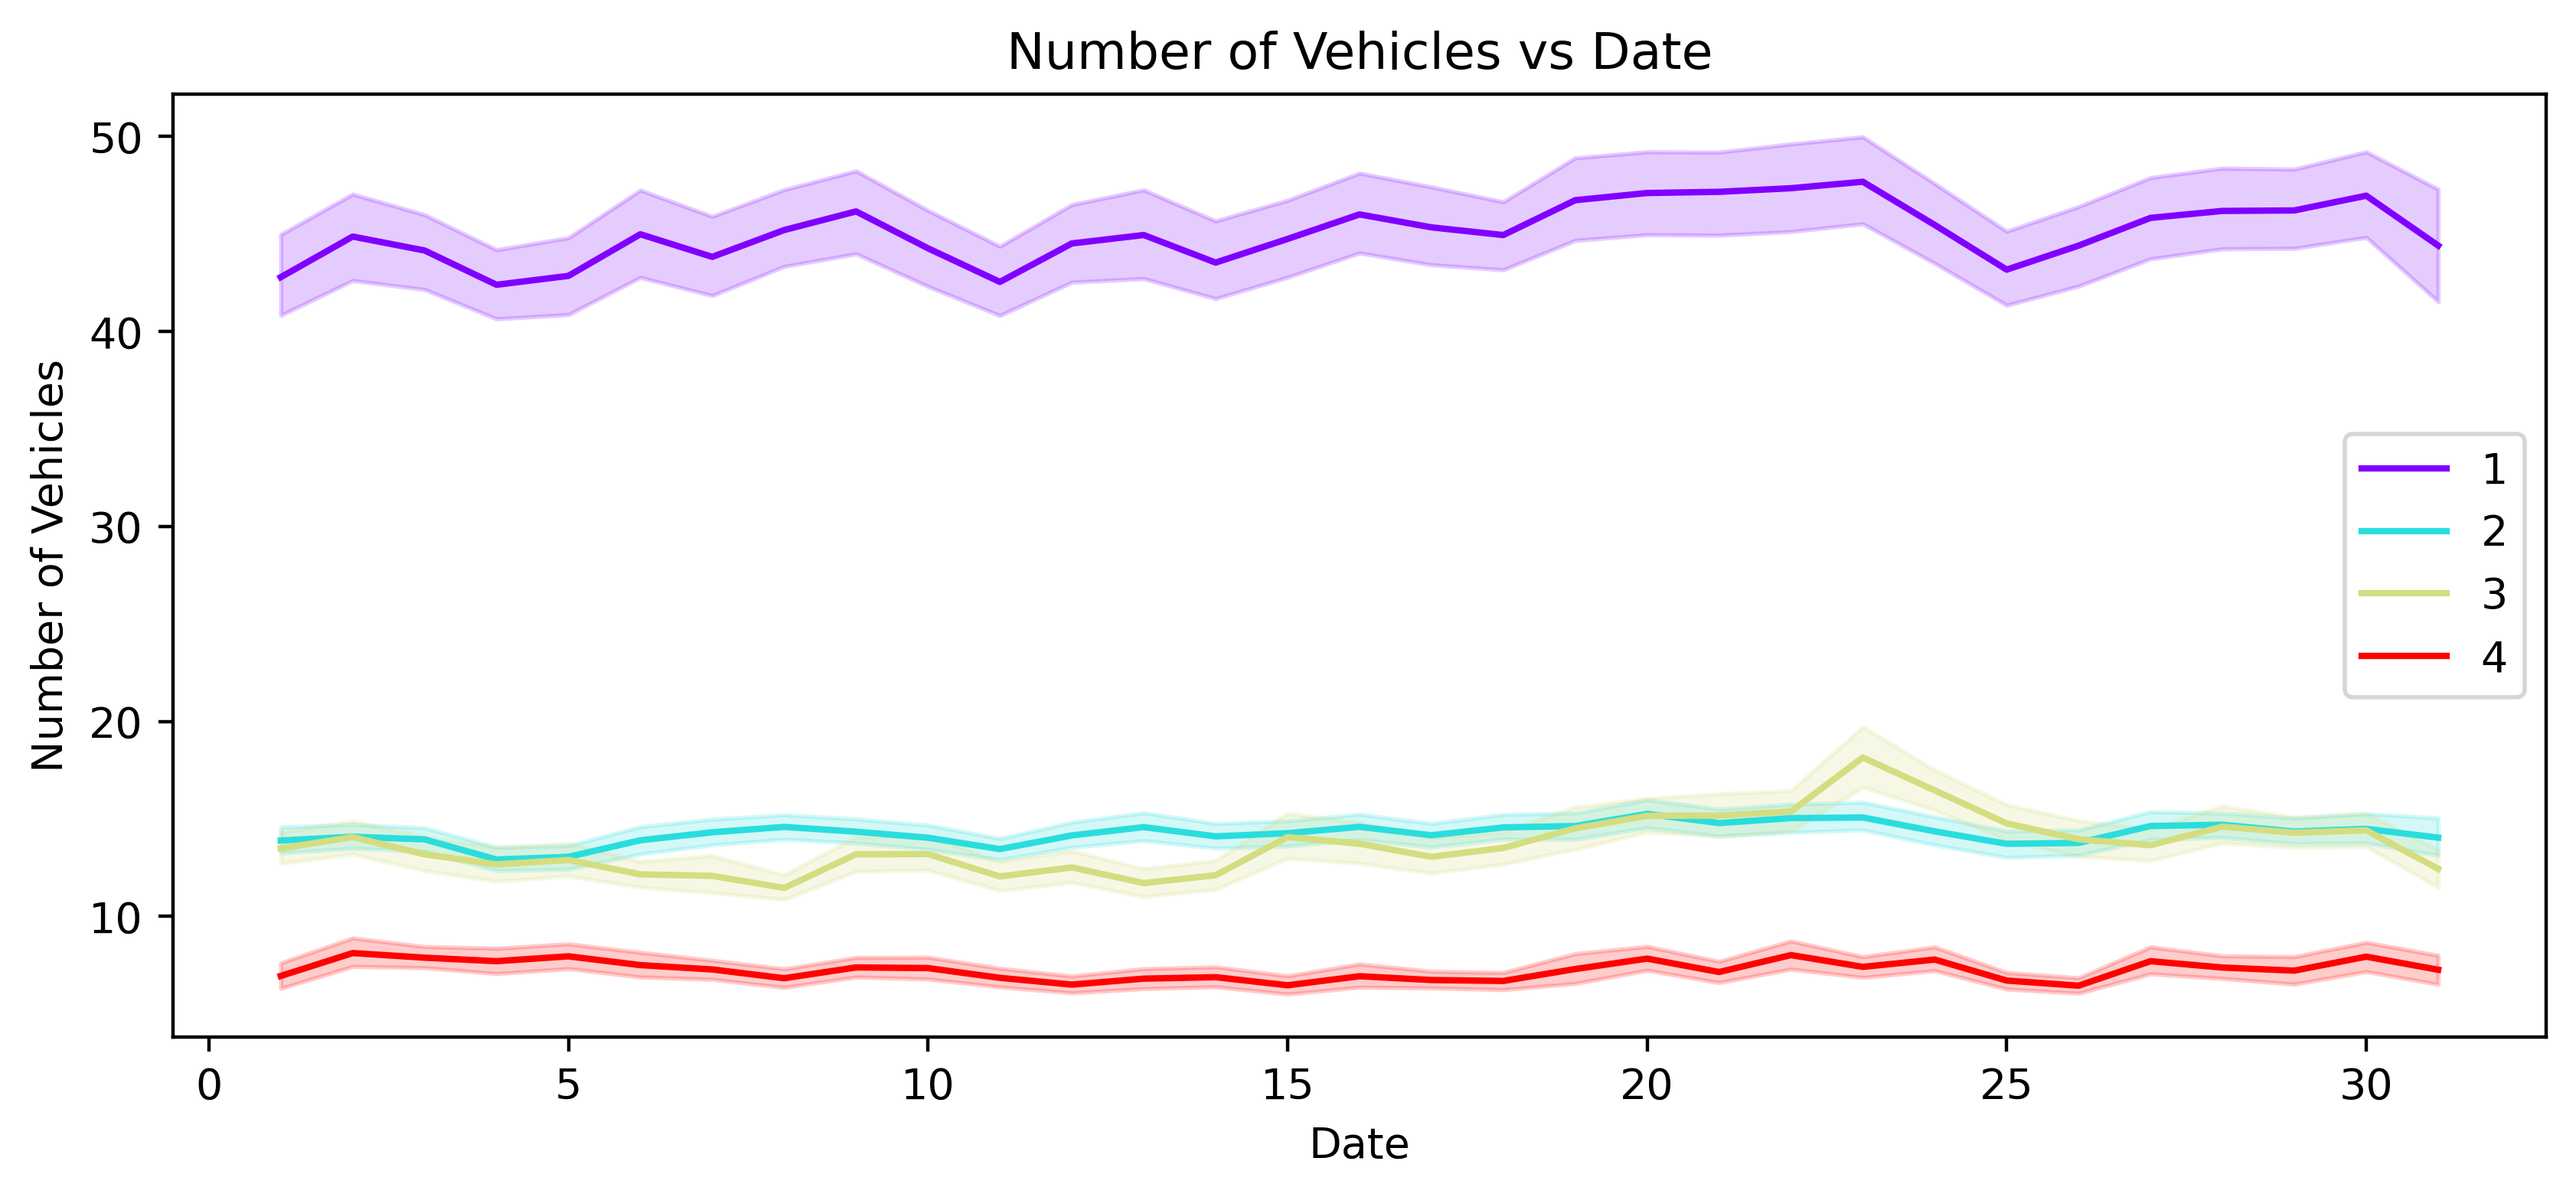

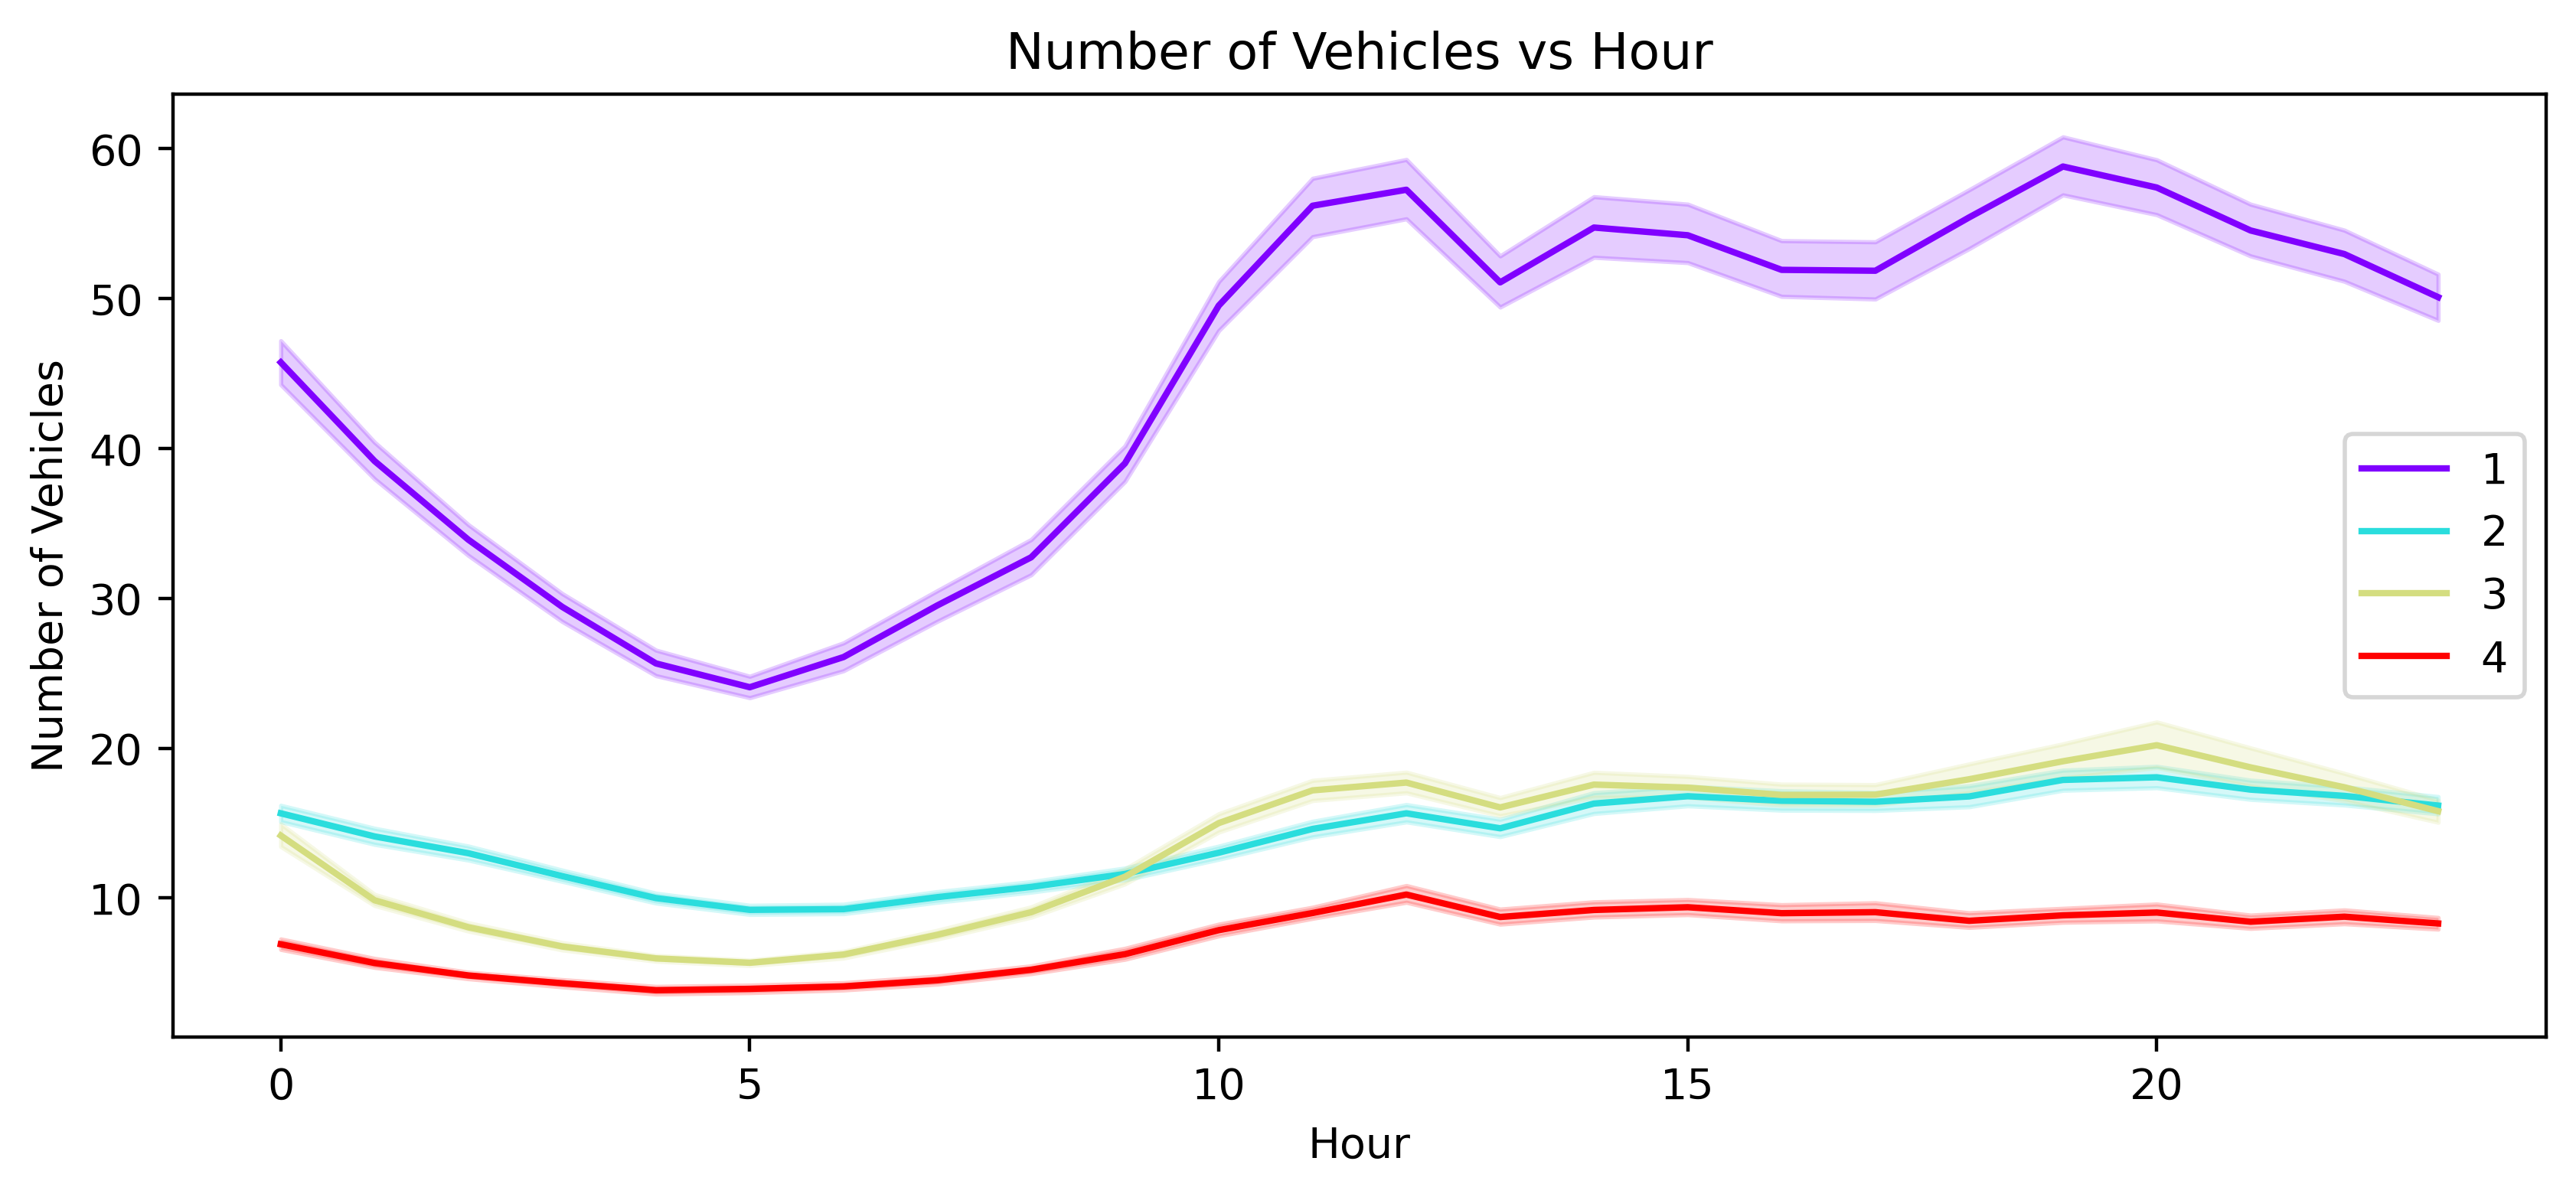

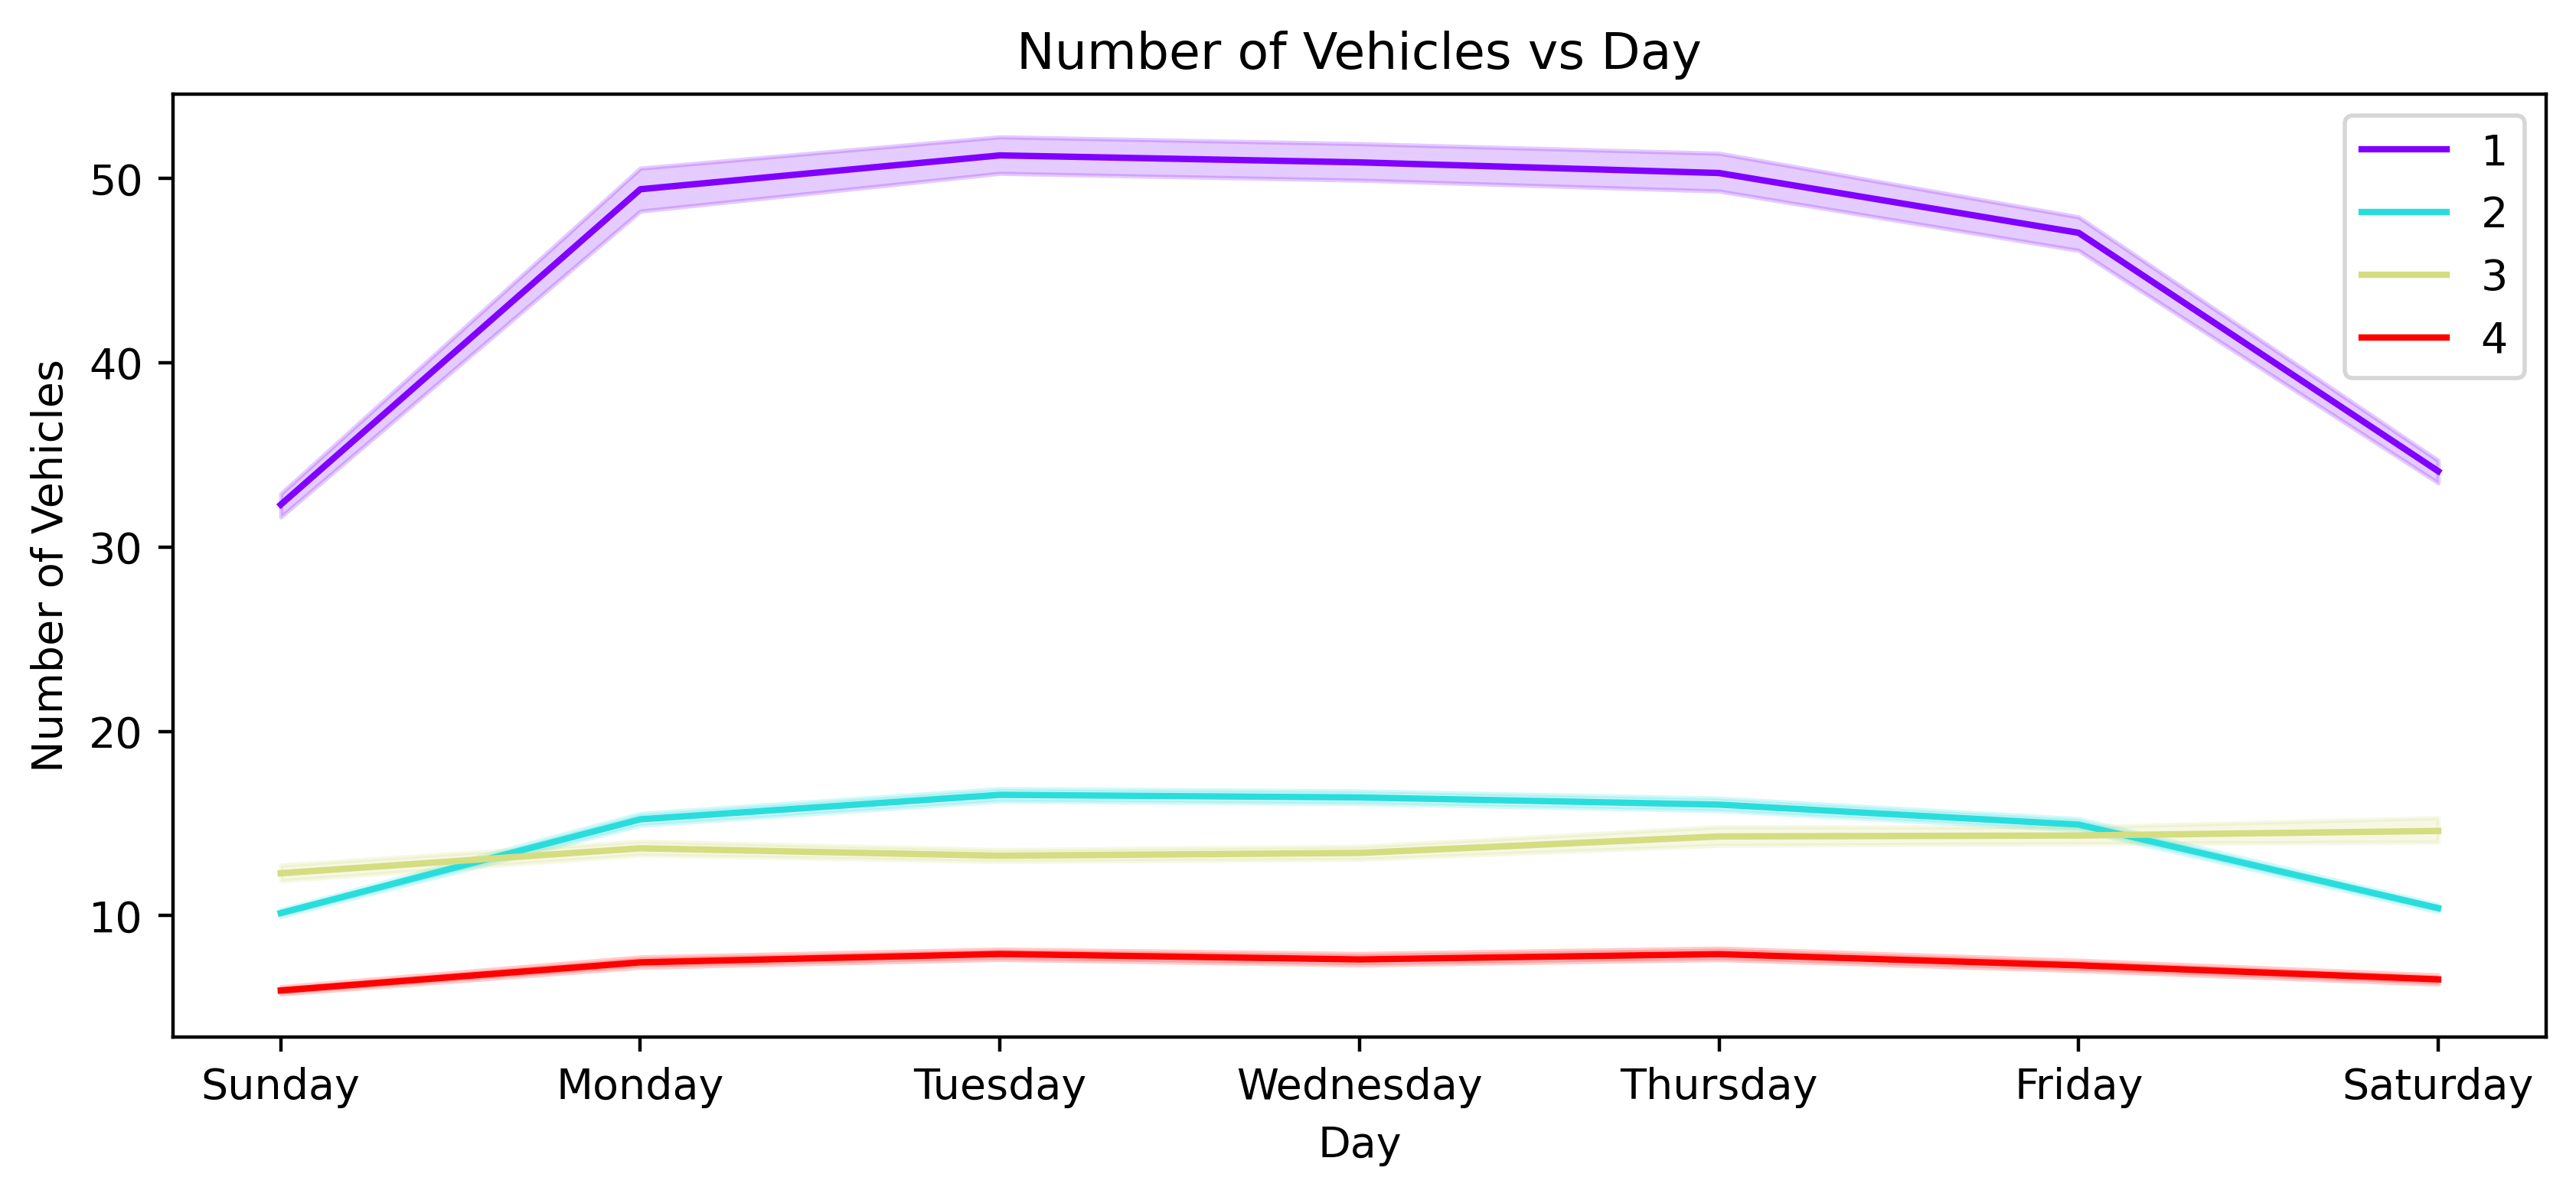

In [125]:
new_features_added= ['Year', 'Month', 'Date', 'Hour', 'Day'] 

for feature in new_features_added: 
    plt.figure(figsize=(10, 4), dpi = 400) 
    sns.lineplot(x = df_new[feature], y = "Vehicles", data = df_new, hue="Junction", palette="rainbow")
    plt.title("Number of Vehicles vs "+ str(feature))
    plt.xlabel(feature) 
    plt.ylabel('Number of Vehicles')
    plt.legend(loc='best') 
    plt.savefig(str(feature)+'.png') 
    plt.show() 

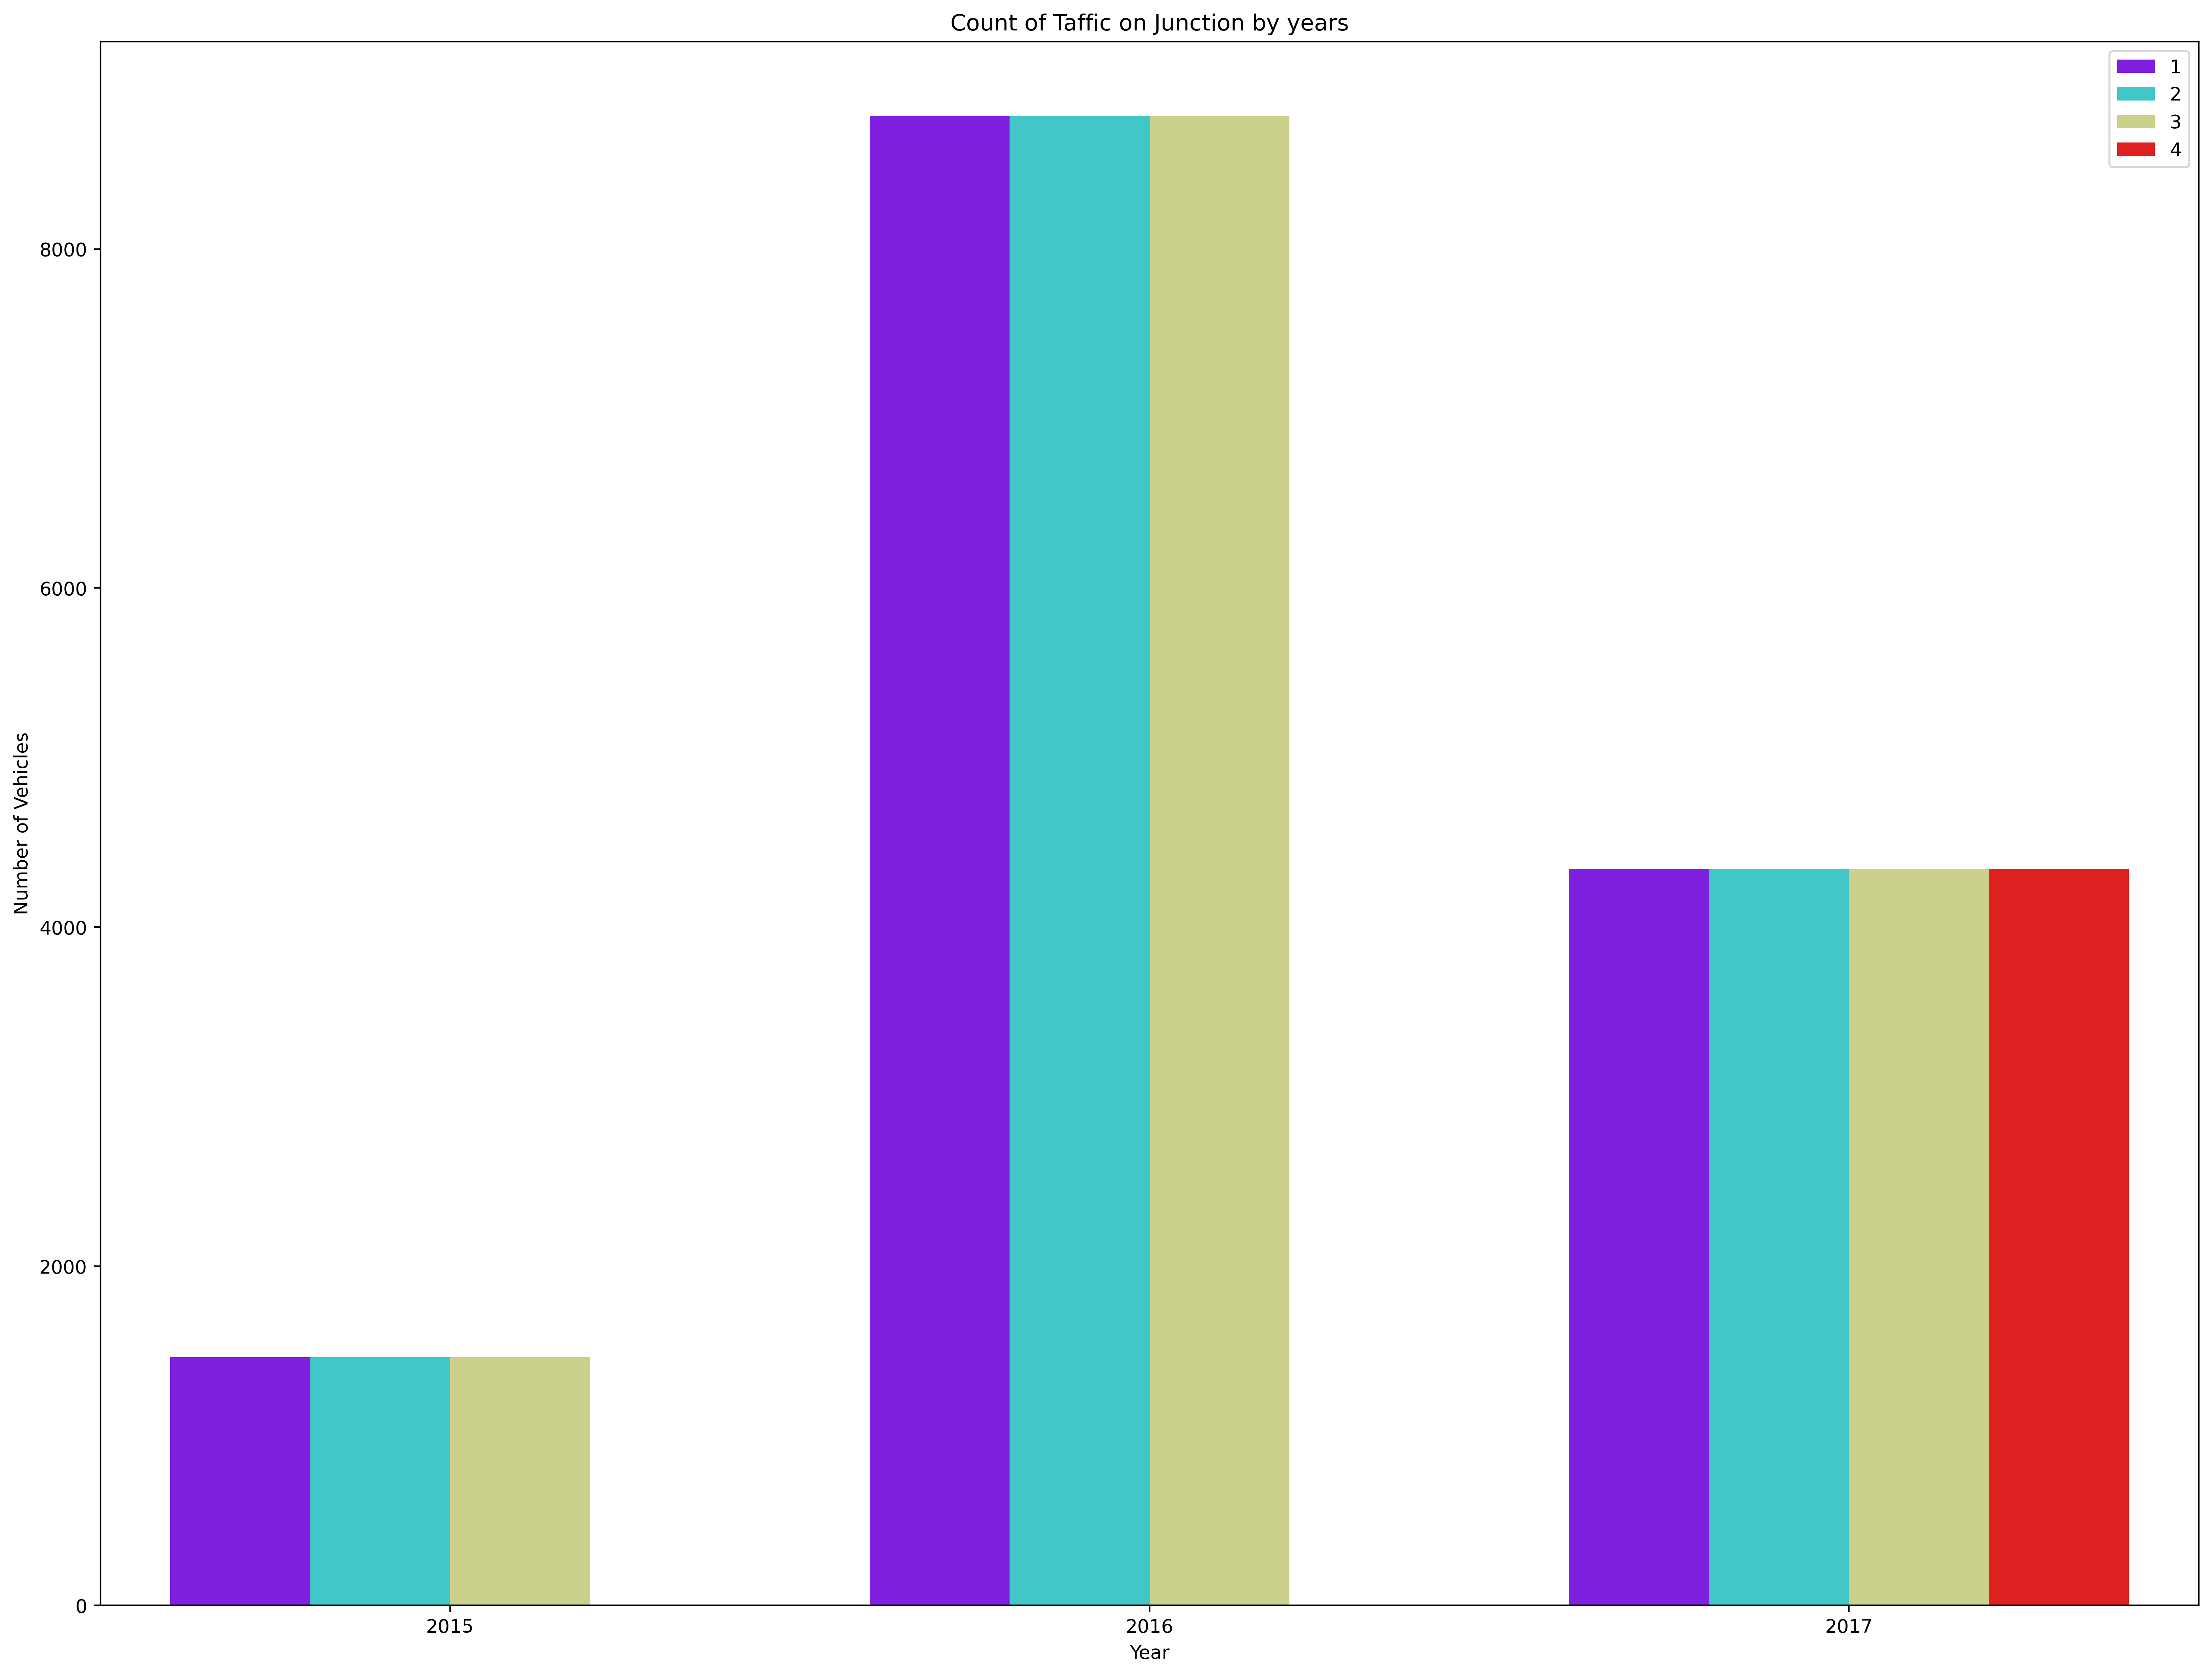

In [126]:
plt.figure(figsize=(20, 15), dpi = 400)  
sns.countplot(x = df_new["Year"], hue="Junction", data = df_new, palette="rainbow") 
plt.title("Count of Taffic on Junction by years") 
plt.xlabel("Year") 
plt.ylabel('Number of Vehicles')
plt.legend(loc='best')
plt.savefig('count_by_years.png')
plt.show() 

In [127]:
values_vehs, counts_vehs = np.unique(df_new['Year'], return_counts=True)
print(values_vehs, counts_vehs)

val_2017, count_2017 = np.unique(df_new['Month'][df_new['Year'] == 2017], return_counts=True)
print("2017 Monthwise: ", val_2017, count_2017)

[2015 2016 2017] [ 4392 26352 17376]
2017 Monthwise:  [1 2 3 4 5 6] [2976 2688 2976 2880 2976 2880]


In [128]:
encoded_values = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6} 

df_new['Day'] = df_new['Day'].map(encoded_values) 
df_new 

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0    6
1     2015-11-01 01:00:00         1        13  2015     11     1     1    6
2     2015-11-01 02:00:00         1        10  2015     11     1     2    6
3     2015-11-01 03:00:00         1         7  2015     11     1     3    6
4     2015-11-01 04:00:00         1         9  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19    4
48116 2017-06-30 20:00:00         4        30  2017      6    30    20    4
48117 2017-06-30 21:00:00         4        16  2017      6    30    21    4
48118 2017-06-30 22:00:00         4        22  2017      6    30    22    4
48119 2017-06-30 23:00:00         4        12  2017      6    30    23    4

[48120 rows x 8 columns]

In [129]:
df_1 = df_new[df_new['Junction'] == 1] 
df_1.head() 

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         1        15  2015     11     1     0    6
1 2015-11-01 01:00:00         1        13  2015     11     1     1    6
2 2015-11-01 02:00:00         1        10  2015     11     1     2    6
3 2015-11-01 03:00:00         1         7  2015     11     1     3    6
4 2015-11-01 04:00:00         1         9  2015     11     1     4    6

In [130]:
df_2 = df_new[df_new['Junction'] == 2] 
df_2.reset_index(drop=True, inplace=True) 
df_2.head() 

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         2         6  2015     11     1     0    6
1 2015-11-01 01:00:00         2         6  2015     11     1     1    6
2 2015-11-01 02:00:00         2         5  2015     11     1     2    6
3 2015-11-01 03:00:00         2         6  2015     11     1     3    6
4 2015-11-01 04:00:00         2         7  2015     11     1     4    6

In [131]:
df_3 = df_new[df_new['Junction'] == 3]
df_3.reset_index(drop=True, inplace=True)
df_3.head()

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         3         9  2015     11     1     0    6
1 2015-11-01 01:00:00         3         7  2015     11     1     1    6
2 2015-11-01 02:00:00         3         5  2015     11     1     2    6
3 2015-11-01 03:00:00         3         1  2015     11     1     3    6
4 2015-11-01 04:00:00         3         2  2015     11     1     4    6

In [132]:
df_4 = df_new[df_new['Junction'] == 4] 
df_4.reset_index(drop = True, inplace = True)
df_4.head() 

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2017-01-01 00:00:00         4         3  2017      1     1     0    6
1 2017-01-01 01:00:00         4         1  2017      1     1     1    6
2 2017-01-01 02:00:00         4         4  2017      1     1     2    6
3 2017-01-01 03:00:00         4         4  2017      1     1     3    6
4 2017-01-01 04:00:00         4         2  2017      1     1     4    6

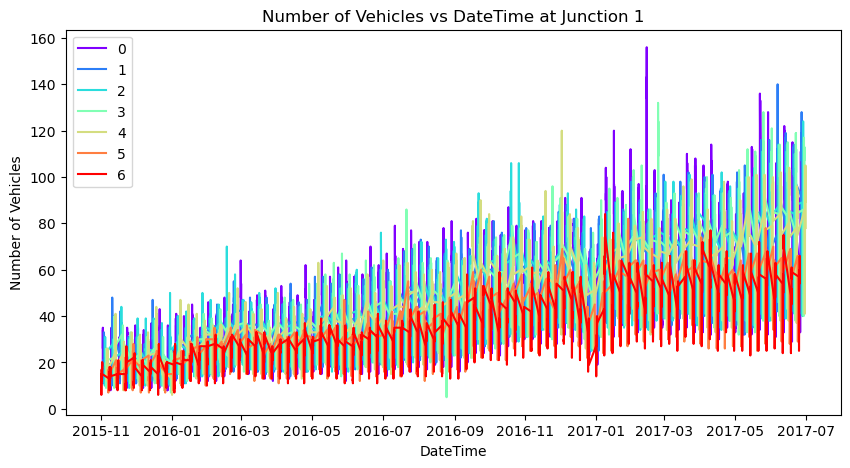

In [133]:
plt.figure(figsize=(10, 5)) 
sns.lineplot(x = df_1['DateTime'], y = "Vehicles", data = df_1, hue="Day", palette="rainbow") 
plt.title("Number of Vehicles vs DateTime at Junction 1") 
plt.xlabel("DateTime") 
plt.ylabel('Number of Vehicles')
plt.legend(loc='best') 
plt.savefig('junction_1.png') 
plt.show() # Showing the plot

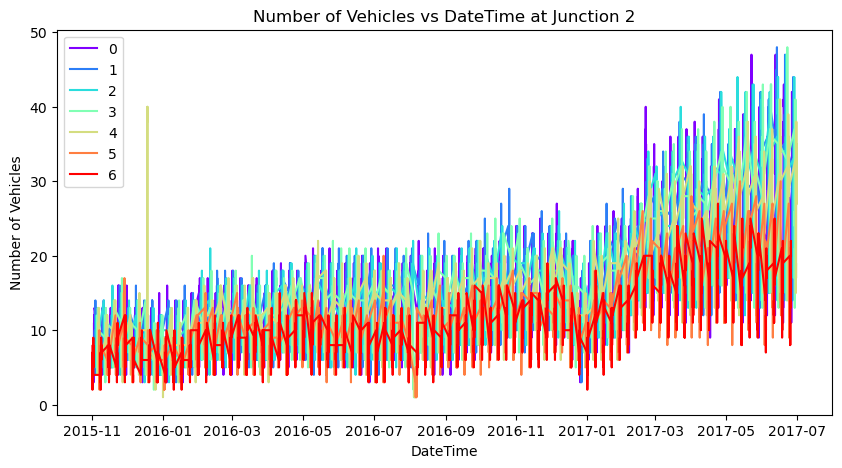

In [134]:
plt.figure(figsize=(10, 5)) 
sns.lineplot(x = df_2['DateTime'], y = "Vehicles", data = df_2, hue="Day", palette="rainbow")
plt.title("Number of Vehicles vs DateTime at Junction 2") 
plt.xlabel("DateTime") 
plt.ylabel('Number of Vehicles') 
plt.legend(loc='best') 
plt.savefig('junction_2.png') 
plt.show()

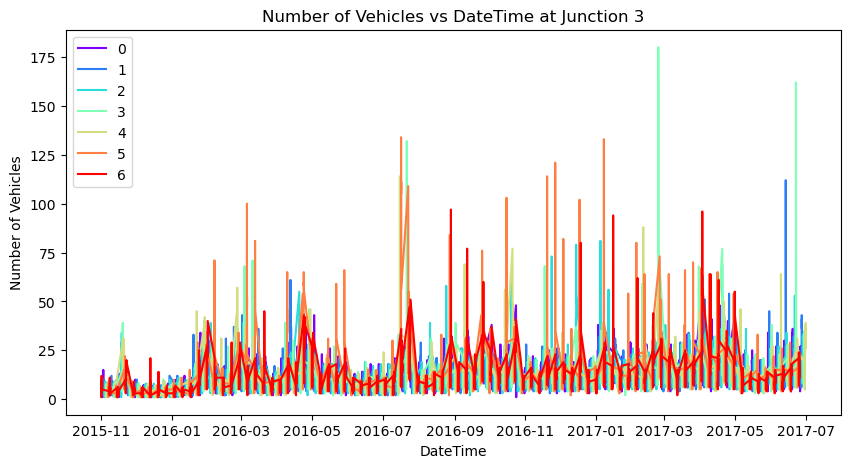

In [135]:

plt.figure(figsize=(10, 5)) 
sns.lineplot(x = df_3['DateTime'], y = "Vehicles", data = df_3, hue="Day", palette="rainbow") 
plt.title("Number of Vehicles vs DateTime at Junction 3")
plt.xlabel("DateTime") 
plt.ylabel('Number of Vehicles') 
plt.legend(loc='best') 
plt.savefig('junction_3.png') 
plt.show()

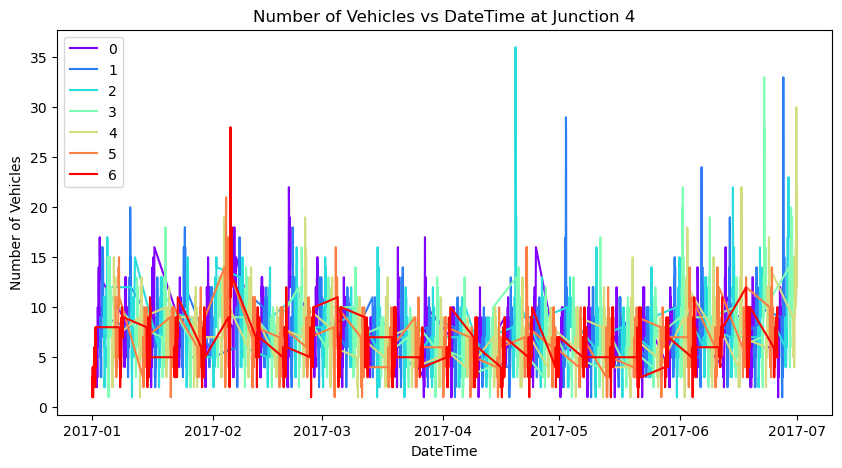

In [136]:

plt.figure(figsize=(10, 5)) 
sns.lineplot(x = df_4['DateTime'], y = "Vehicles", data = df_4, hue="Day", palette="rainbow") 
plt.title("Number of Vehicles vs DateTime at Junction 4") 
plt.xlabel("DateTime") 
plt.ylabel('Number of Vehicles') 
plt.legend(loc='best') 
plt.savefig('junction_4.png') 
plt.show()

In [137]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [138]:
X1, y1 = df_1.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_1['Vehicles']
X2, y2 = df_2.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_2['Vehicles']
X3, y3 = df_3.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_3['Vehicles']
X4, y4 = df_4.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_4['Vehicles']

In [139]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [140]:
X_trains = [X1_train, X2_train, X3_train, X4_train] 
X_tests = [X1_test, X2_test, X3_test, X4_test] 
y_trains = [y1_train, y2_train, y3_train, y4_train] 
y_tests = [y1_test, y2_test, y3_test, y4_test]

In [141]:
models = [DecisionTreeRegressor(max_depth=5, random_state=42, 
            min_samples_leaf=5, min_samples_split=5),
            LinearRegression(), 
            RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=5, min_samples_split=5),]

In [142]:
def plot_prediction_vs_datetime(df, y_pred, y_test, title): 
    plt.figure(figsize=(10, 5)) 
    sns.lineplot(x = [i for i in range(df.shape[0])], y = y_test, data = df, palette="rainbow", label="Actual") 
    sns.lineplot(x = [i for i in range(df.shape[0])],y= y_pred, data = df, palette="rainbow", label="Predicted") 
    plt.title(title)
    plt.xlabel("DateTime") 
    plt.ylabel('Number of Vehicles') 
    plt.legend(loc='best') 
    plt.show() 

In [143]:
models_short = ["DecisionTreeRegressor", "LinearRegressor", "RandomForestRegressor",]

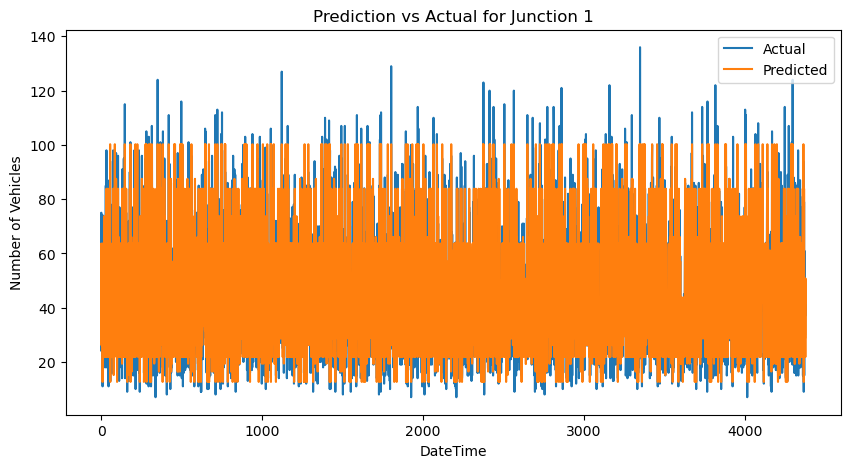

Accuracy score (Junction 1) for the model DecisionTreeRegressor on the train set: 0.8760136747446263
Accuracy score (Junction 1) for the model DecisionTreeRegressor on the test set: 0.8750423103000151
RMSE score (Junction 1) for the model DecisionTreeRegressor on the test set: 8.063584560348051


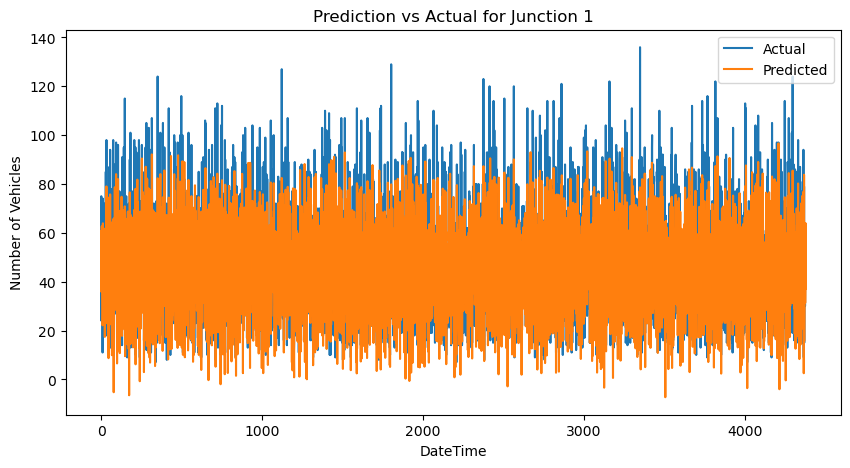

Accuracy score (Junction 1) for the model LinearRegressor on the train set: 0.7069572473028425
Accuracy score (Junction 1) for the model LinearRegressor on the test set: 0.6984381456389861
RMSE score (Junction 1) for the model LinearRegressor on the test set: 12.52664741751258


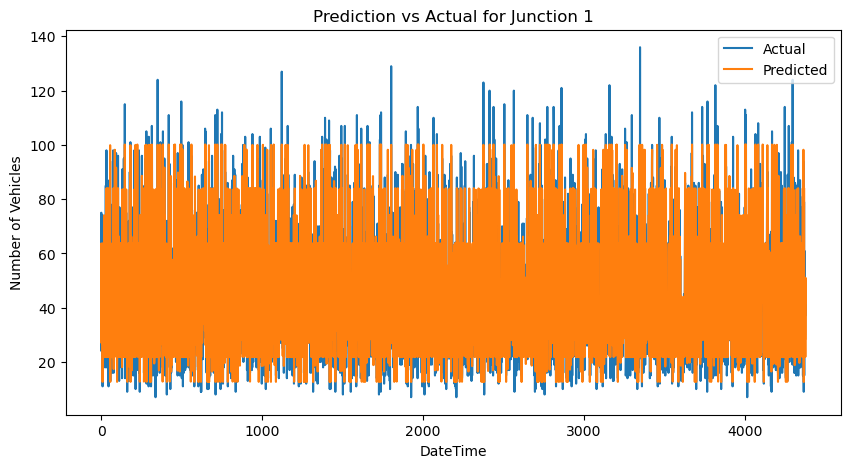

Accuracy score (Junction 1) for the model RandomForestRegressor on the train set: 0.8794272263636089
Accuracy score (Junction 1) for the model RandomForestRegressor on the test set: 0.878332160972062
RMSE score (Junction 1) for the model RandomForestRegressor on the test set: 7.95672866573454


In [144]:
model_used_Junction_1 = [] 
scores_train_Junction_1 = [] 
scores_test_Junction_1 = [] 
rmse_Junction_1 = [] 

for i in range(len(models)): 
    models[i].fit(X_trains[0], y_trains[0])
    preds_test = models[i].predict(X_tests[0]) 
    preds_complete = models[i].predict(X1) 
    plot_prediction_vs_datetime(X_tests[0], preds_test, y_tests[0], 'Prediction vs Actual for Junction 1') 
    train_score = models[i].score(X_trains[0], y_trains[0]) 
    test_score = models[i].score(X_tests[0], y_tests[0]) 
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the train set: {train_score}") 
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the test set: {test_score}")
    print(f"RMSE score (Junction 1) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[0], preds_test)**(1/2)}") 
    model_used_Junction_1.append(models[i]) 
    scores_train_Junction_1.append(train_score) 
    scores_test_Junction_1.append(test_score)
    rmse_Junction_1.append(mean_squared_error(y_tests[0], preds_test)**0.5) 

In [145]:
print("FOR JUNCTION 1\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junction_1[i]} - Test Score: {scores_test_Junction_1[i]} - RMSE: {rmse_Junction_1[i]}\n")

FOR JUNCTION 1

DecisionTreeRegressor
   Train Score: 0.8760136747446263 - Test Score: 0.8750423103000151 - RMSE: 8.063584560348051

LinearRegressor
   Train Score: 0.7069572473028425 - Test Score: 0.6984381456389861 - RMSE: 12.52664741751258

RandomForestRegressor
   Train Score: 0.8794272263636089 - Test Score: 0.878332160972062 - RMSE: 7.95672866573454



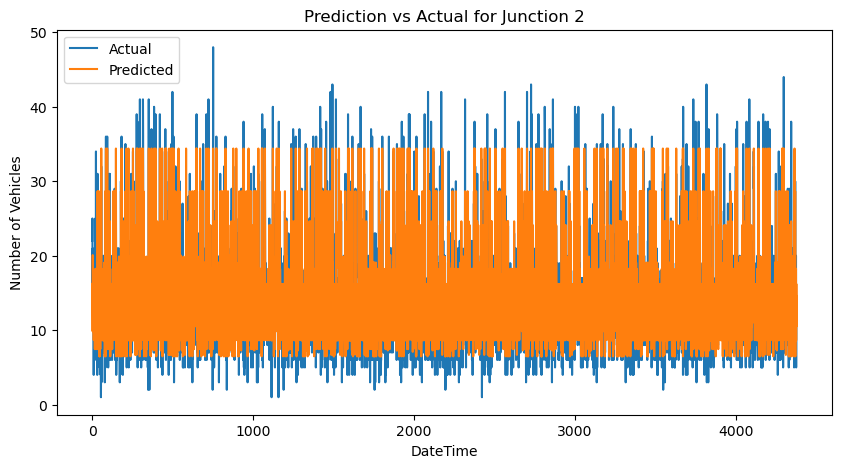

Accuracy score (Junction 2) for the model DecisionTreeRegressor on the train set: 0.8167766040732465
Accuracy score (Junction 2) for the model DecisionTreeRegressor on the test set: 0.8023516054130561
RMSE score (Junction 2) for the model DecisionTreeRegressor on the test set: 3.2429842223555956


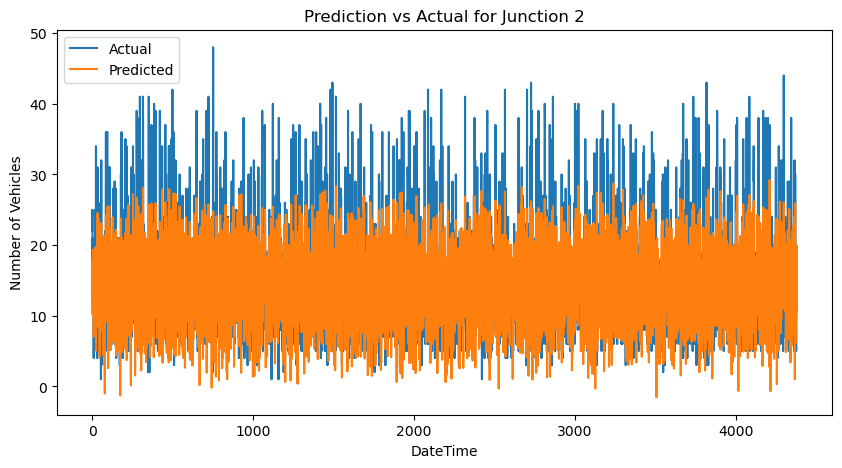

Accuracy score (Junction 2) for the model LinearRegressor on the train set: 0.6067568859214327
Accuracy score (Junction 2) for the model LinearRegressor on the test set: 0.5827797775561314
RMSE score (Junction 2) for the model LinearRegressor on the test set: 4.711735094611163


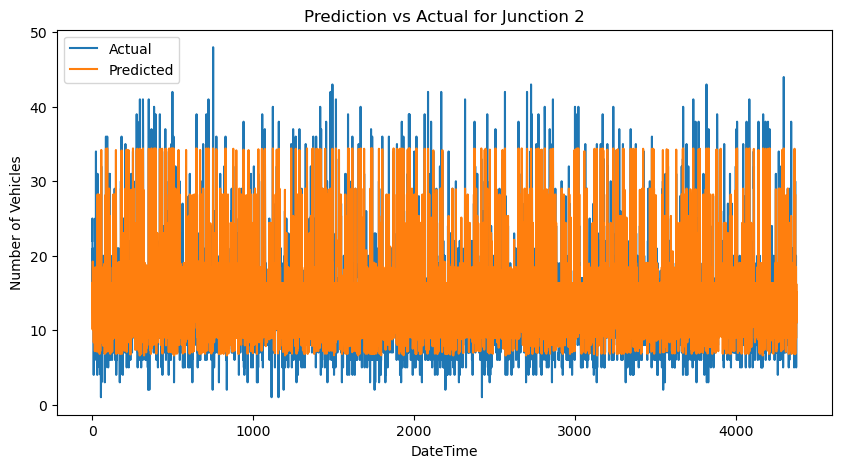

Accuracy score (Junction 2) for the model RandomForestRegressor on the train set: 0.8292168077966436
Accuracy score (Junction 2) for the model RandomForestRegressor on the test set: 0.8142337595941102
RMSE score (Junction 2) for the model RandomForestRegressor on the test set: 3.1439931135663666


In [146]:
models_used_Junctions_2 = [] 
scores_train_Junctions_2 = [] 
scores_test_Junctions_2 = [] 
rmse_Junctions_2 = [] 

for i in range(len(models)): 
    models[i].fit(X_trains[1], y_trains[1]) 
    preds_test = models[i].predict(X_tests[1]) 
    preds_complete = models[i].predict(X2) 
    plot_prediction_vs_datetime(X_tests[1], preds_test, y_tests[1], 'Prediction vs Actual for Junction 2') 
    train_score = models[i].score(X_trains[1], y_trains[1])
    test_score = models[i].score(X_tests[1], y_tests[1]) 
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the train set: {train_score}") 
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the test set: {test_score}") 
    print(f"RMSE score (Junction 2) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[1], preds_test)**(1/2)}")
    models_used_Junctions_2.append(models[i]) 
    scores_train_Junctions_2.append(train_score) 
    scores_test_Junctions_2.append(test_score) 
    rmse_Junctions_2.append(mean_squared_error(y_tests[1], preds_test)**0.5) 

In [147]:
print("FOR JUNCTION 2\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_2[i]} - Test Score: {scores_test_Junctions_2[i]} - RMSE: {rmse_Junctions_2[i]}\n")

FOR JUNCTION 2

DecisionTreeRegressor
   Train Score: 0.8167766040732465 - Test Score: 0.8023516054130561 - RMSE: 3.2429842223555956

LinearRegressor
   Train Score: 0.6067568859214327 - Test Score: 0.5827797775561314 - RMSE: 4.711735094611163

RandomForestRegressor
   Train Score: 0.8292168077966436 - Test Score: 0.8142337595941102 - RMSE: 3.1439931135663666



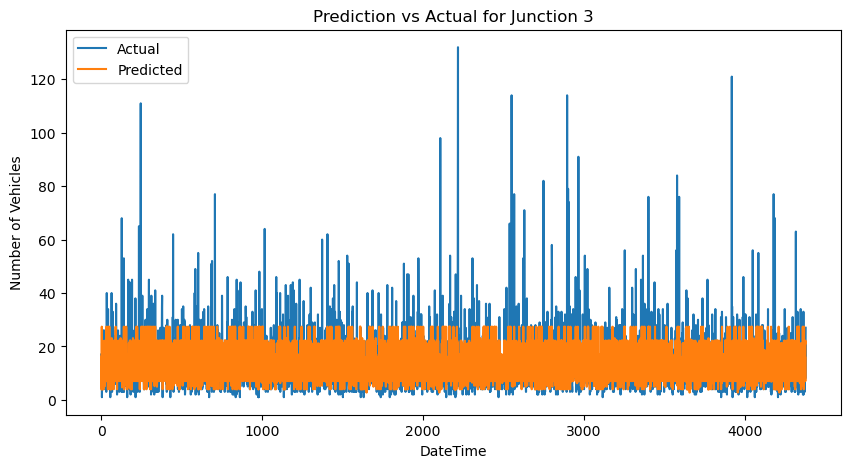

Accuracy score (Junction 3) for the model DecisionTreeRegressor on the train set: 0.38661385785904556
Accuracy score (Junction 3) for the model DecisionTreeRegressor on the test set: 0.3535319926934828
RMSE score (Junction 3) for the model DecisionTreeRegressor on the test set: 8.276766149450202


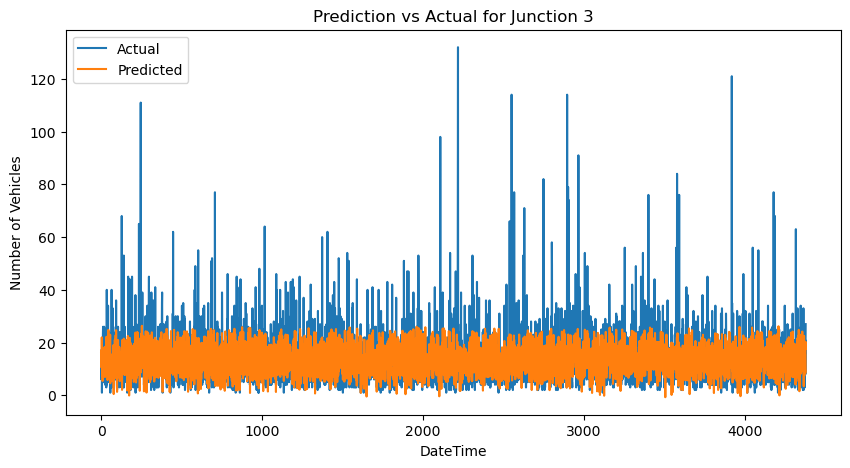

Accuracy score (Junction 3) for the model LinearRegressor on the train set: 0.24682276617399068
Accuracy score (Junction 3) for the model LinearRegressor on the test set: 0.2413476998279558
RMSE score (Junction 3) for the model LinearRegressor on the test set: 8.966202760882561


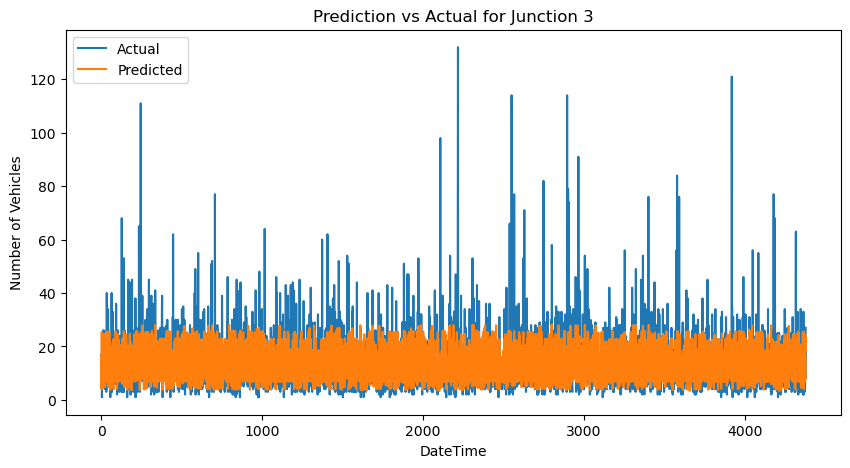

Accuracy score (Junction 3) for the model RandomForestRegressor on the train set: 0.4064305395606803
Accuracy score (Junction 3) for the model RandomForestRegressor on the test set: 0.38282086575674923
RMSE score (Junction 3) for the model RandomForestRegressor on the test set: 8.087099448332618


In [148]:
models_used_Junctions_3 = [] 
scores_train_Junctions_3 = [] 
scores_test_Junctions_3 = [] 
rmse_Junctions_3 = [] 
 
for i in range(len(models)): 
    models[i].fit(X_trains[2], y_trains[2]) 
    preds_test = models[i].predict(X_tests[2]) 
    preds_complete = models[i].predict(X3)
    plot_prediction_vs_datetime(X_tests[2], preds_test, y_tests[2], 'Prediction vs Actual for Junction 3') 
    train_score = models[i].score(X_trains[2], y_trains[2]) 
    test_score = models[i].score(X_tests[2], y_tests[2])
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the train set: {train_score}") 
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the test set: {test_score}") 
    print(f"RMSE score (Junction 3) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[2], preds_test)**(1/2)}")
    models_used_Junctions_3.append(models[i]) 
    scores_train_Junctions_3.append(train_score) 
    scores_test_Junctions_3.append(test_score) 
    rmse_Junctions_3.append(mean_squared_error(y_tests[2], preds_test)**0.5) 

In [149]:
print("FOR JUNCTION 3\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_3[i]} - Test Score: {scores_test_Junctions_3[i]} - RMSE: {rmse_Junctions_3[i]}\n")

FOR JUNCTION 3

DecisionTreeRegressor
   Train Score: 0.38661385785904556 - Test Score: 0.3535319926934828 - RMSE: 8.276766149450202

LinearRegressor
   Train Score: 0.24682276617399068 - Test Score: 0.2413476998279558 - RMSE: 8.966202760882561

RandomForestRegressor
   Train Score: 0.4064305395606803 - Test Score: 0.38282086575674923 - RMSE: 8.087099448332618



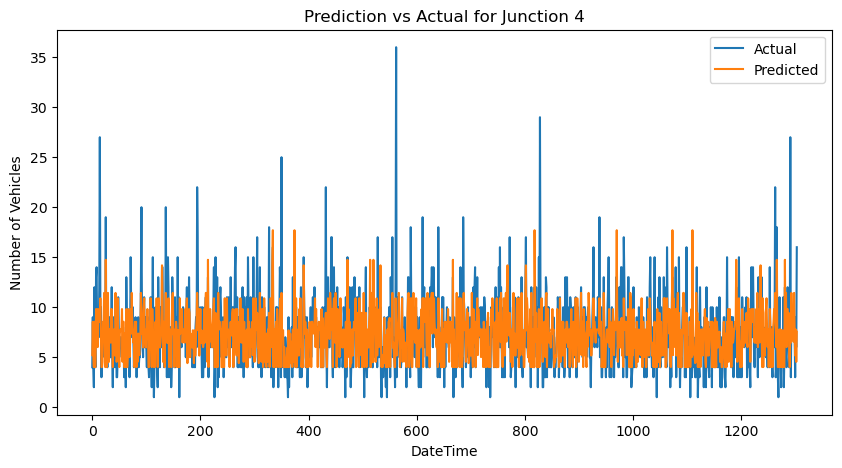

Accuracy score (Junction 4) for the model DecisionTreeRegressor on the train set: 0.5186797303401008
Accuracy score (Junction 4) for the model DecisionTreeRegressor on the test set: 0.41850534679957385
RMSE score (Junction 4) for the model DecisionTreeRegressor on the test set: 2.7904956815627573


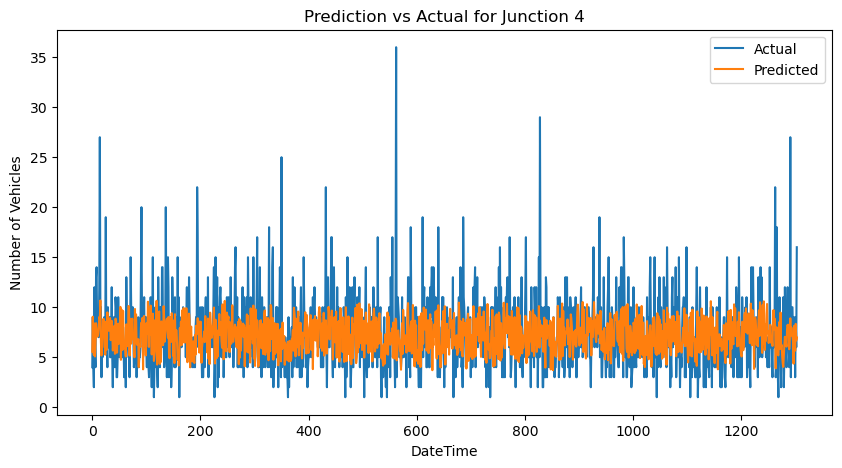

Accuracy score (Junction 4) for the model LinearRegressor on the train set: 0.22259052505139187
Accuracy score (Junction 4) for the model LinearRegressor on the test set: 0.21991673107338583
RMSE score (Junction 4) for the model LinearRegressor on the test set: 3.2320567188930602


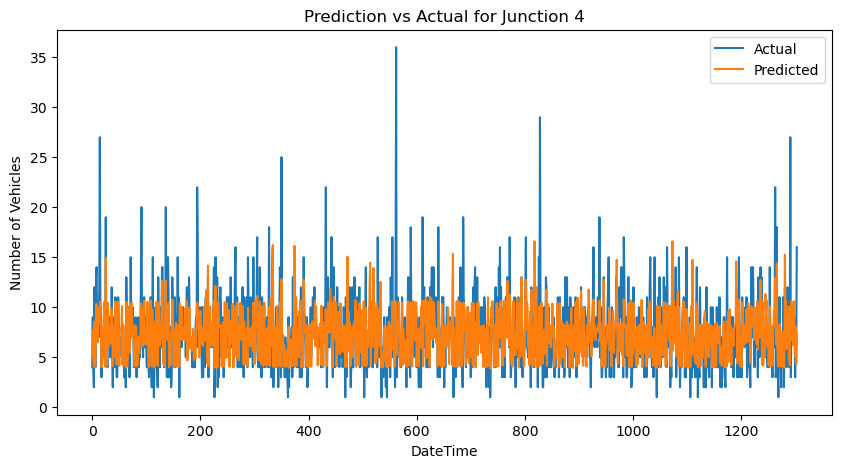

Accuracy score (Junction 4) for the model RandomForestRegressor on the train set: 0.5410231027446601
Accuracy score (Junction 4) for the model RandomForestRegressor on the test set: 0.4501981600292204
RMSE score (Junction 4) for the model RandomForestRegressor on the test set: 2.713386040299166


In [150]:
models_used_Junctions_4 = [] 
scores_train_Junctions_4 = [] 
scores_test_Junctions_4 = [] 
rmse_Junctions_4 = [] 

for i in range(len(models)): 
    models[i].fit(X_trains[3], y_trains[3]) 
    preds_test = models[i].predict(X_tests[3]) 
    preds_complete = models[i].predict(X4) 
    plot_prediction_vs_datetime(X_tests[3], preds_test, y_tests[3], 'Prediction vs Actual for Junction 4') 
    train_score = models[i].score(X_trains[3], y_trains[3]) 
    test_score = models[i].score(X_tests[3], y_tests[3]) 
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the train set: {train_score}") 
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the test set: {test_score}") 
    print(f"RMSE score (Junction 4) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[3], preds_test)**(1/2)}") 
    models_used_Junctions_4.append(models[i]) 
    scores_train_Junctions_4.append(train_score) 
    scores_test_Junctions_4.append(test_score) 
    rmse_Junctions_4.append(mean_squared_error(y_tests[3], preds_test)**0.5)

In [151]:
print("FOR JUNCTION 4\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_4[i]} - Test Score: {scores_test_Junctions_4[i]} - RMSE: {rmse_Junctions_4[i]}\n")

FOR JUNCTION 4

DecisionTreeRegressor
   Train Score: 0.5186797303401008 - Test Score: 0.41850534679957385 - RMSE: 2.7904956815627573

LinearRegressor
   Train Score: 0.22259052505139187 - Test Score: 0.21991673107338583 - RMSE: 3.2320567188930602

RandomForestRegressor
   Train Score: 0.5410231027446601 - Test Score: 0.4501981600292204 - RMSE: 2.713386040299166



In [152]:
linear_models = {"Junction 1": models[1], "Junction 2": models[1], "Junction 3": models[1], "Junction 4": models[1]}
decision_models = {"Junction 1": models[0], "Junction 2": models[0], "Junction 3": models[0], "Junction 4": models[0]}

In [153]:
linear_model_1 = linear_models["Junction 1"]
linear_model_2 = linear_models["Junction 2"]
linear_model_3 = linear_models["Junction 3"]
linear_model_4 = linear_models["Junction 4"]

decision_model_1 = decision_models["Junction 1"]
decision_model_2 = decision_models["Junction 2"]
decision_model_3 = decision_models["Junction 3"]
decision_model_4 = decision_models["Junction 4"]

In [154]:
linear_model_1.fit(X_trains[0], y_trains[0]) 


LinearRegression()

In [155]:
decision_model_1.fit(X_trains[0], y_trains[0])

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [156]:
linear_model_2.fit(X_trains[1], y_trains[1]) 


LinearRegression()

In [157]:
decision_model_2.fit(X_trains[1], y_trains[1])


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [158]:
linear_model_2.fit(X_trains[2], y_trains[2]) 


LinearRegression()

In [159]:
decision_model_2.fit(X_trains[2], y_trains[2])


DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [160]:
linear_model_3.fit(X_trains[3], y_trains[3]) 


LinearRegression()

In [161]:
decision_model_3.fit(X_trains[3], y_trains[3])

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=42)

In [162]:
import pickle

In [163]:
data1 = {"model" : linear_model_1, "le_day" : encoded_values} 
data2 = {"model" : linear_model_2, "le_day" : encoded_values} 
data3 = {"model" : linear_model_3, "le_day" : encoded_values} 
data4 = {"model" : linear_model_4, "le_day" : encoded_values} 
data5 = {"model" : decision_model_1, "le_day" : encoded_values} 
data6 = {"model" : decision_model_2, "le_day" : encoded_values} 
data7 = {"model" : decision_model_3, "le_day" : encoded_values} 
data8 = {"model" : decision_model_4, "le_day" : encoded_values} 

In [164]:
with open('linear_model_1.pkl', 'wb') as f1:
    pickle.dump(data1, f1)

with open('linear_model_2.pkl', 'wb') as f2: 
    pickle.dump(data2, f2)

with open('linear_model_3.pkl', 'wb') as f3: 
    pickle.dump(data3, f3) 
 
with open('linear_model_4.pkl', 'wb') as f4: 
    pickle.dump(data4, f4) 

with open('decision_model_1.pkl', 'wb') as f5:
    pickle.dump(data5, f5)

with open('decision_model_2.pkl', 'wb') as f6: 
    pickle.dump(data6, f6)

with open('decision_model_3.pkl', 'wb') as f7: 
    pickle.dump(data7, f7) 
 
with open('decision_model_4.pkl', 'wb') as f8: 
    pickle.dump(data8, f8) 